<a href="https://colab.research.google.com/github/dipakpatil2001/Regression-Project-Retail_Sales_Prediction/blob/main/Copy_of_Regression_Project_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

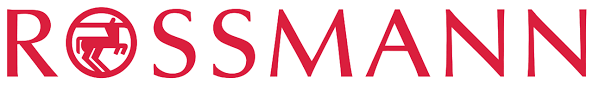

## **Project Name**   - Retail Sales Prediction on Rossmann Store.



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Dipak Balram Patil

# **Project Summary -**

To build a sales price prediction model for Rossmann Stores, we will undertake the following steps:
1. Data Integration:

 Combine the Rossmann Stores Data with the Store Data to create a comprehensive dataset that includes store attributes along with sales data.
2. Data Cleaning:

 Handle missing values in the Store Data, either by imputation or removal, depending on the nature of the data.
 Ensure data types are appropriate for each feature, converting dates and categoricals as needed.
3. Feature Engineering:

  Derive new features that may have predictive power, such as time since competition opened, time since a store was remodeled, and indicators for promotions.
Encode categorical variables using one-hot encoding or label encoding.
4. Exploratory Data Analysis (EDA)
:

 Analyze sales trends over time to understand seasonality and other patterns.
Investigate the relationship between sales and other variables, such as promotions, store type, and competition.
5. Model Selection
:

 Choose appropriate machine learning models for regression, such as linear regression, random forest, or gradient boosting machines.
Consider time series models if the temporal aspect is significant.
6. Model Training and Validation
:

  Split the data into training and validation sets to evaluate model performance.
Use cross-validation to ensure the model's robustness.
7. Model Optimization
:

 Tune hyperparameters to improve model performance.
Feature selection to identify the most important predictors.
8. Model Evaluation:

 Assess the model using appropriate metrics, such as RMSE (Root Mean Square Error) for continuous sales predictions.

Each step will be executed with careful consideration of the data's characteristics and the business context of Rossmann Stores. The goal is to create a reliable and accurate model that can inform decision-making and strategy for the company's sales initiatives.


# **GitHub Link -**

Provide your GitHub Link here. https://github.com/dipakpatil2001/Regression-Project-Retail_Sales_Prediction

# **Problem Statement**


To develope the Machine Learning Regression Model to predicts the daily sales for up to six weeks in advance for 1115 Rossmann Stores across Europe. The model should take into account various factors that influence the sales such as promotions, competition, holidays, seasonality, locality, etc.

Our goal is to help Rossmann Store management make informed sales prediction so that they can manage various factors such as inventory management, staffinan g, and promotional strategies which will ultimately lead to increase in sales and profitability for the business.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

There have been given two datasets:
1. Rossmann Store Data.CSV
2. Store.CSV

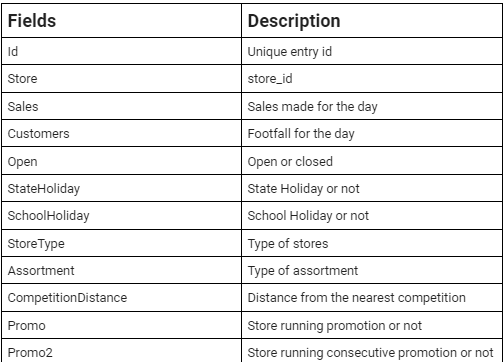

**These variables provide a comprehensive view of the sales data and store characteristics within the Rossmann dataset.**

### Import Libraries and define functions



In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# To display all the columns in Dataframe
pd.set_option('display.max_columns', None)

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
import random
%matplotlib inline
import seaborn as sns
import plotly as pl
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Set the plot style and display options
plt.style.use('ggplot')
sns.set()

#to handle missing values
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# def plot_line_graph_with_two_features_over_time(dataframe, x_feature, y_feature, time, title):
def plot_line_graph_with_two_feature_over_time(dataframe, x_feature, y_feature, time, title):
    plt.figure(figsize=(24, 6))

    times = dataframe[time].unique()
    list_of_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    #   # plot each line graph
    for color_num, int_time in enumerate(times):
        temp_df = dataframe[dataframe[time] == int_time]
        temp_df = temp_df.groupby(x_feature)[y_feature].sum().reset_index()
        plt.plot(temp_df[x_feature], temp_df[y_feature], label=int_time, color=list_of_colors[color_num % len(list_of_colors)], marker="o")
        plt.xticks(range(1, dataframe[x_feature].max()+1))

    plt.title(f'{title} {y_feature} Over {time}s')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.show()

In [4]:
# define a function to calculate the vif of all features
# returns a dataframe
def calculate_vif_of_all_features(dataframe):
  temp_df = pd.DataFrame()
  temp_df['Feature'] = dataframe.columns
  temp_df['VIF'] = [variance_inflation_factor(dataframe.values, column_index) for column_index in range(dataframe.shape[1])]

  return temp_df

In [5]:
# generate density plots of a feature in a dataframe
# prints a density plot
def density_plot_of_a_feature(dataframe, feature):
  plt.figure(figsize=(8, 6))
  sns.distplot(dataframe[feature])
  plt.show()

### Dataset Loading

In [6]:
# Load the Rossmann Stores Data
rossmann_data = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/Rossmann Stores Data.csv')
# Load the Store Data
store_data = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/store.csv')

### Dataset First View

In [7]:
# Dataset First Look
rossmann_data.head()    #Rossmann Stores Data first 3 rows

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
rossmann_data.tail()    #Rossmann Stores Data last 3 rows

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [9]:
store_data.head()    #Store Data first 3 rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_data.tail()    #Store Data last 3 rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
# Count the number of rows and columns for both datasets
rossmann_shape = rossmann_data.shape
store_shape = store_data.shape

# Display the shape of the datasets
print('Rossmann Stores Data shape:', rossmann_shape)
print('Store Data shape:', store_shape)

Rossmann Stores Data shape: (1017209, 9)
Store Data shape: (1115, 10)


**The Rossmann Stores Data contains 1,017,209 rows and 9 columns.**

**The Store Data comprises 1,115 rows and 10 columns.**

### Dataset Information

In [12]:
# Dataset Info
print('Rossmann Stores Data Info:')
print(rossmann_data.info())
print('\nStore Data Info:')
print(store_data.info())

Rossmann Stores Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType   

In [13]:
rossmann_data.describe()    #summary statistics for rossmann data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
store_data.describe()    #summary statistics for store data

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
rossmann_duplicates = rossmann_data.duplicated().sum()
store_duplicates = store_data.duplicated().sum()

# Display the number of duplicates
print('Number of duplicate rows in Rossmann Stores Data:', rossmann_duplicates)
print('Number of duplicate rows in Store Data:', store_duplicates)

Number of duplicate rows in Rossmann Stores Data: 0
Number of duplicate rows in Store Data: 0


**There are no duplicate rows in either the Rossmann Stores Data or the Store Data.**

#### Missing Values/Null Values

In [16]:
## Missing Values/Null Values Count
def missing_value_count(df):
  return [print(f"There are {missing_values} missing values in {i}"  if (missing_values := df[i].isnull().sum()) >=1 else f"There are 0 missing values in {i}") for i in df.columns]


In [17]:
# Missing Values/Null Values Count
rossmann_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [18]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


**The Rossmann Stores Data does not have any missing values across its columns. However, the Store Data has some missing values**

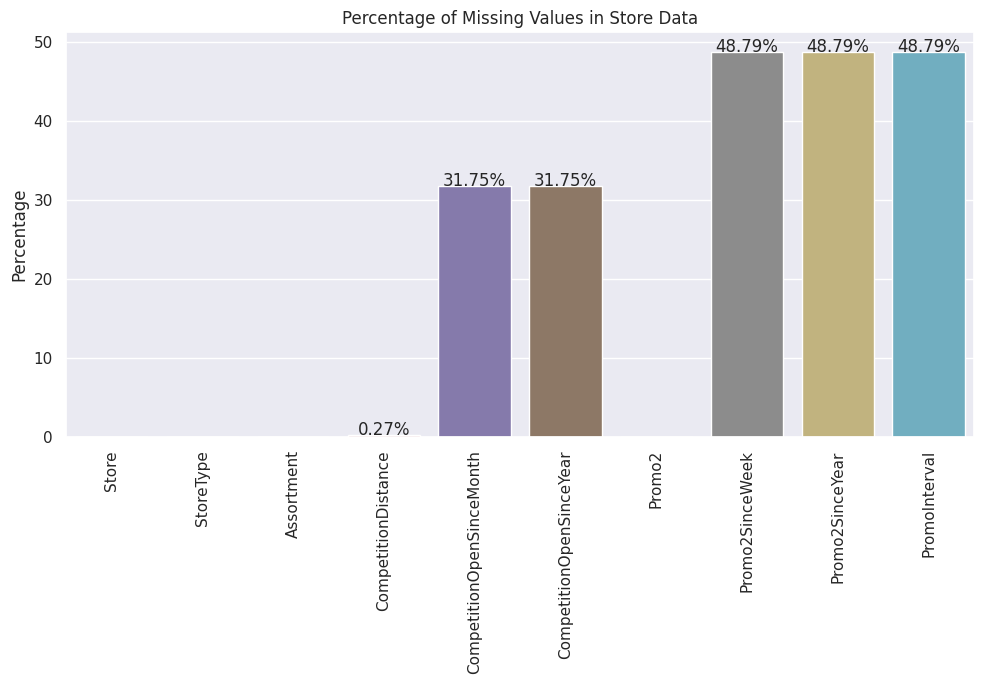

In [19]:
# Visualizing the missing values
# Calculate the percentage of missing values for each column
store_missing_percentage = store_data.isnull().mean() * 100

# Create a bar plot for the missing values percentage
plt.figure(figsize=(10, 7))
sns.barplot(x=store_missing_percentage.index, y=store_missing_percentage.values)
plt.title('Percentage of Missing Values in Store Data')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Adding annotations on top of the bars
for index, value in enumerate(store_missing_percentage.values):
    if value > 0: # Only annotate bars with missing values
        plt.text(index, value, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

Six out of 10 columns in store data have missing values in them. They must be handled properly inorder to get an accurate result.



CompetitionDistance is a numerical feature. Lets check its density plot to choose the value we need to impute missing values.



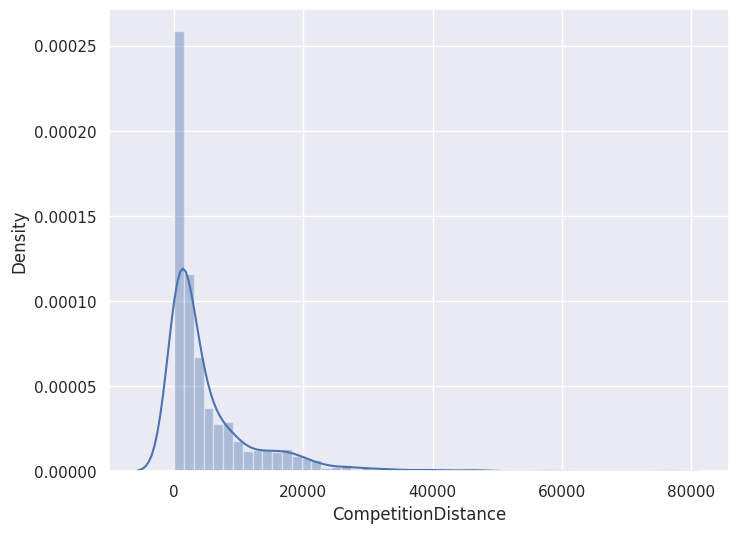

In [21]:
# create a density plot to show the distribution of values in CompetitionDistance
density_plot_of_a_feature(store_data, 'CompetitionDistance')

The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median. Since the PDF of the peak of the distribution is very low, it is better to go with median instead of mode.

In [24]:
# filling the missing values with median
store_data["CompetitionDistance"].fillna(value = store_data.CompetitionDistance.median(), inplace=True)

Both CompetitionOpenSinceMonth and CompetitionOpenSinceYear have the same number of missing values. This may mean that both the features have missing values in the same rows.

In [26]:
count = 0
for index, row in store_data.iterrows():
  if np.isnan(row["CompetitionOpenSinceMonth"]) and np.isnan(row["CompetitionOpenSinceYear"]):
    count += 1
print(count)

354


So, both the features have missing values in the same rows. Now lets check if its related to CompetitionDistance.

In [31]:
# show CompetitionDistance, CompetitionOpenSinceMonth and CompetitionOpenSinceYear for rows
# where CompetitionOpenSinceMonth and CompetitionOpenSinceYear have missing values
store_data[np.isnan(store_data["CompetitionOpenSinceMonth"])].loc[:, ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
11,1070.0,NaN,NaN
12,310.0,NaN,NaN
15,3270.0,NaN,NaN
18,3240.0,NaN,NaN
21,1040.0,NaN,NaN
...,...,...,...
1095,1130.0,NaN,NaN
1099,540.0,NaN,NaN
1112,9260.0,NaN,NaN
1113,870.0,NaN,NaN


Since no useful information was obtained from the above process, lets impute missing values with the most frequent values.

In [36]:
# filling the missing values with mode
store_data["CompetitionOpenSinceMonth"].fillna(value = store_data.CompetitionOpenSinceMonth.mode()[0], inplace=True)
store_data["CompetitionOpenSinceYear"].fillna(value = store_data.CompetitionOpenSinceYear.mode()[0], inplace=True)

Promo2SinceWeek, Promo2SinceYear and PromoInterval have the same number of missing values. This may indicate that these features have missing values in the same rows.

In [39]:
# check if Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values in the same rows
count = 0
for index, row in store_data.iterrows():
  if np.isnan(row["Promo2SinceWeek"]) and np.isnan(row["Promo2SinceYear"]) and np.isnan(row["PromoInterval"]):
    count += 1
print(count)

544


So, these features have missing values in the same rows. Now lets check if its related to Promo2.

In [40]:
# show Promo2, Promo2SinceWeek, Promo2SinceYear and PromoInterval for rows
# where Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values
store_data[np.isnan(store_data["Promo2SinceWeek"])].loc[:, ["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN
...,...,...,...,...
1107,0,NaN,NaN,NaN
1109,0,NaN,NaN,NaN
1111,0,NaN,NaN,NaN
1112,0,NaN,NaN,NaN


Promo2 value of head and tail of the above dataframe is 0. Lets check whether missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2.

In [42]:
# show the count of each unique value in Promo2
store_data["Promo2"].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

So, missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2. Lets impute missing values with 0.

In [44]:
# filling the missing values with value 0
store_data["Promo2SinceWeek"].fillna(value = 0, inplace=True)
store_data["Promo2SinceYear"].fillna(value = 0, inplace=True)
store_data["PromoInterval"].fillna(value = 0, inplace=True)

In [45]:
# Now let us check number of missing values in the store data
missing_value_count(store_data)

There are 0 missing values in Store
There are 0 missing values in StoreType
There are 0 missing values in Assortment
There are 0 missing values in CompetitionDistance
There are 0 missing values in CompetitionOpenSinceMonth
There are 0 missing values in CompetitionOpenSinceYear
There are 0 missing values in Promo2
There are 0 missing values in Promo2SinceWeek
There are 0 missing values in Promo2SinceYear
There are 0 missing values in PromoInterval


[None, None, None, None, None, None, None, None, None, None]

### What did you know about your dataset?

Based on the analysis conducted so far on the Rossmann Stores Data and the Store Data, here's a summary of key insights:

**Data Completeness**
 * The Rossmann Stores Data is complete with no missing values. The Store Data, however, has missing values in several columns related to competition and promotions.

**Duplicates:**
 * There are no duplicate rows in either dataset, indicating that each entry is unique.

**Missing Values Visualization:**
 * The annotated bar plot for the Store Data indicates that some columns had a significant percentage of missing values, particularly "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear".

These insights provide a foundational understanding of the datasets' structure and integrity, which is crucial for any further analysis or predictive modeling.

## ***2. Understanding Your Variables***

In [350]:
# Dataset rows and columns
print('Rossmann Stores Data shape:', rossmann_shape)
print('Store Data shape:', store_shape)

Rossmann Stores Data shape: (1017209, 9)
Store Data shape: (1115, 10)


In [351]:
# Dataset columns
print("Number of columns in Rossmann data:",len(rossmann_data.columns))
print("column names in Rossmann data:",list(rossmann_data.columns))
print("-----------------------------------------------------------")
print("Number of columns in Store data:",len(store_data.columns))
print("column names in Store data:",list(store_data.columns))

Number of columns in Rossmann data: 9
column names in Rossmann data: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
-----------------------------------------------------------
Number of columns in Store data: 10
column names in Store data: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [352]:
# Dataset describe - Rossmann data
rossmann_data.describe(include = 'all') #Summary statistics for Rossmann data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [353]:
# Dataset Describe - Store data
store_data.describe(include = 'all') #Summary statistics for Store data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description

The datasets contain the following variables:

**Rossmann Stores Data:**
1. Store: An identifier for each store.
2. DayOfWeek: The day of the week represented numerically.
3. Date: The date of sales data.
4. Sales: The turnover for any given day (**this is what you are predicting**).
5. Customers: The number of customers on a given day.
6. Open: An indicator for whether the store was open: 0 = closed, 1 = open.
7. Promo: Indicates whether a store is running a promo on that day.
8. StateHoliday: Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
9. SchoolHoliday: Indicates if the (Store, Date) was affected by the closure of public schools.

**Store Data:**

1. Store: An identifier for each store.
2. StoreType: Differentiates between 4 different store models: a, b, c, d.
3. Assortment: Describes an assortment level: a = basic, b = extra, c = extended.
4. CompetitionDistance: Distance in meters to the nearest competitor store.
5. CompetitionOpenSinceMonth: Gives the approximate month of the time the nearest competitor was opened.
6. CompetitionOpenSinceYear: Gives the approximate year of the time the nearest competitor was opened.
7. Promo2: Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
8. Promo2SinceWeek: Describes the calendar week when the store started participating in Promo2.
9. Promo2SinceYear: Describes the year when the store started participating in Promo2.
10. PromoInterval: Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g., "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

**These variables provide a comprehensive view of the sales data and store characteristics within the Rossmann dataset.**

### Check Unique Values for each variable.

In [354]:
# Check Unique Values for each variable.
print(rossmann_data.nunique())
print("-----------------------------------------")
print(store_data.nunique())

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64
-----------------------------------------
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


In [348]:
rossmann_data.apply(lambda x: x.unique())

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object

In [349]:
store_data.apply(lambda x: x.unique())

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object

In [356]:
# Fill null values in store data set
store_data.fillna(0, inplace=True)

# Check for any remaining null values
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

The null values have been filled with **zeros** in dataset. This approach was chosen to maintain the integrity of the data and avoid any potential bias that might be introduced by using the median.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [357]:
store_data.shape

(1115, 10)

In [358]:
rossmann_data.shape

(1017209, 9)

In [359]:
# Write your code to make your dataset analysis ready.
# Merge the datasets into a single dataframe using how='left'
total_df = pd.merge(rossmann_data, store_data, on='Store', how='left')
total_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [360]:
# Extract year, month, and day as integers
total_df['Date'] = pd.to_datetime(total_df['Date'])
total_df['Year'] = total_df['Date'].dt.year
total_df['Month'] = total_df['Date'].dt.month
total_df['WeekOfYear'] = total_df['Date'].dt.week

In [361]:
total_df.shape

(1017209, 21)

The datasets have now been merged using how="left", which includes all records from the Rossmann Stores Data and the matching records from the Store Data. The head of this left-joined dataframe is displayed above.

In [362]:
print("Shape of the Total dataframe: ",total_df.shape)
print(total_df.dtypes)

Shape of the Total dataframe:  (1017209, 21)
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int64
Month                                 int64
WeekOfYear                            int64
dtype: object


In [363]:
# Identify categorical values in columns with data type as object
obj_dtype = ['StateHoliday','StoreType','Assortment','PromoInterval']
for i in obj_dtype:
  print(i)
  print(total_df[i].unique())
  print("----------------------")

StateHoliday
['0' 'a' 'b' 'c' 0]
----------------------
StoreType
['c' 'a' 'd' 'b']
----------------------
Assortment
['a' 'c' 'b']
----------------------
PromoInterval
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
----------------------


#Categorical Encoding

In [364]:
# Convert 'Date' column to datetime format
total_df['Date'] = pd.to_datetime(total_df['Date'], format = '%Y-%m-%d')

# Convert 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval' columns to integer format
# Mapping for StateHoliday
state_holiday_map = {'a': 1, 'b': 2, 'c': 3, '0': 0}
total_df['StateHoliday'] = total_df['StateHoliday'].map(state_holiday_map)

# Mapping for StoreType
store_type_map = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
total_df['StoreType'] = total_df['StoreType'].map(store_type_map)

# Mapping for Assortment
assortment_map = {'a': 1, 'b': 2, 'c': 3}
total_df['Assortment'] = total_df['Assortment'].map(assortment_map)

# Mapping for PromoInterval
promo_interval_map = {'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}
total_df['PromoInterval'] = total_df['PromoInterval'].map(promo_interval_map)
print(total_df.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                        float64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                       float64
Year                                  int64
Month                                 int64
WeekOfYear                            int64
dtype: object


In [365]:
total_df.head(3)    # Dataframe view after converting categorical values into numerical values

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0.0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0.0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0.0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0,2015,7,31


### What all manipulations have you done and insights you found?

The manipulation performed involved:


Filling in any missing values in the dataframe with zeros. This ensures that the data is in a suitable format for further analysis.

The insights found from this manipulation are:

1. Converted the 'Date' column to the format 'YYYY-MM-DD'.
2. Mapped the 'PromoInterval' column to numerical values based on defined intervals. Also mapped 'StateHoliday', 'StoreType', 'Assortment' columns to integer format which were of Object Data Type.
3. Filled missing values in the dataframe with zeros.

These changes facilitate a more suitable for analysis and modeling process, as numerical data is often required for various statistical and machine learning techniques.

The dataframe has been updated with these manipulations, ensuring that the data is in a suitable format for further analysis, exploration and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

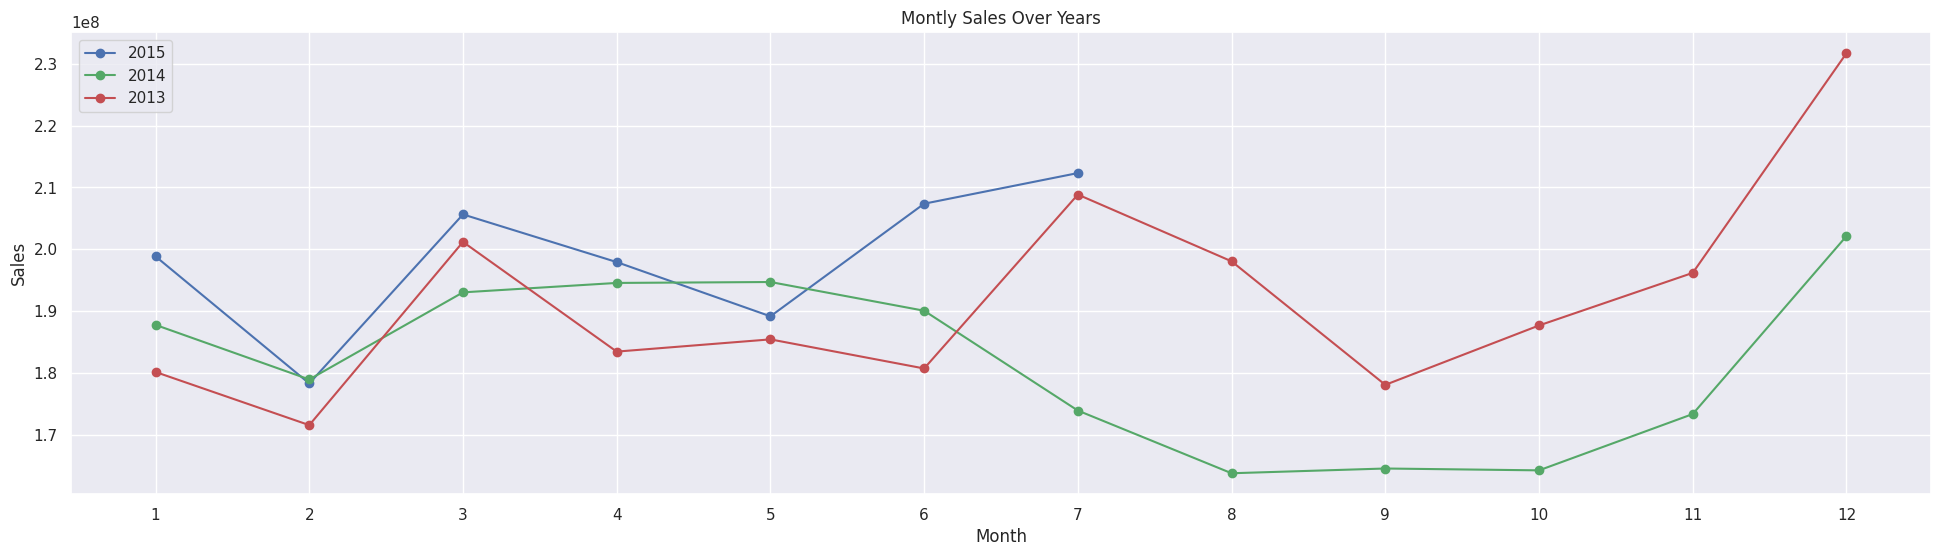

In [366]:
# line graph for montly sales over years
# Calling already defined function for better code modularity
plot_line_graph_with_two_feature_over_time(total_df, 'Month', 'Sales', 'Year', 'Montly')

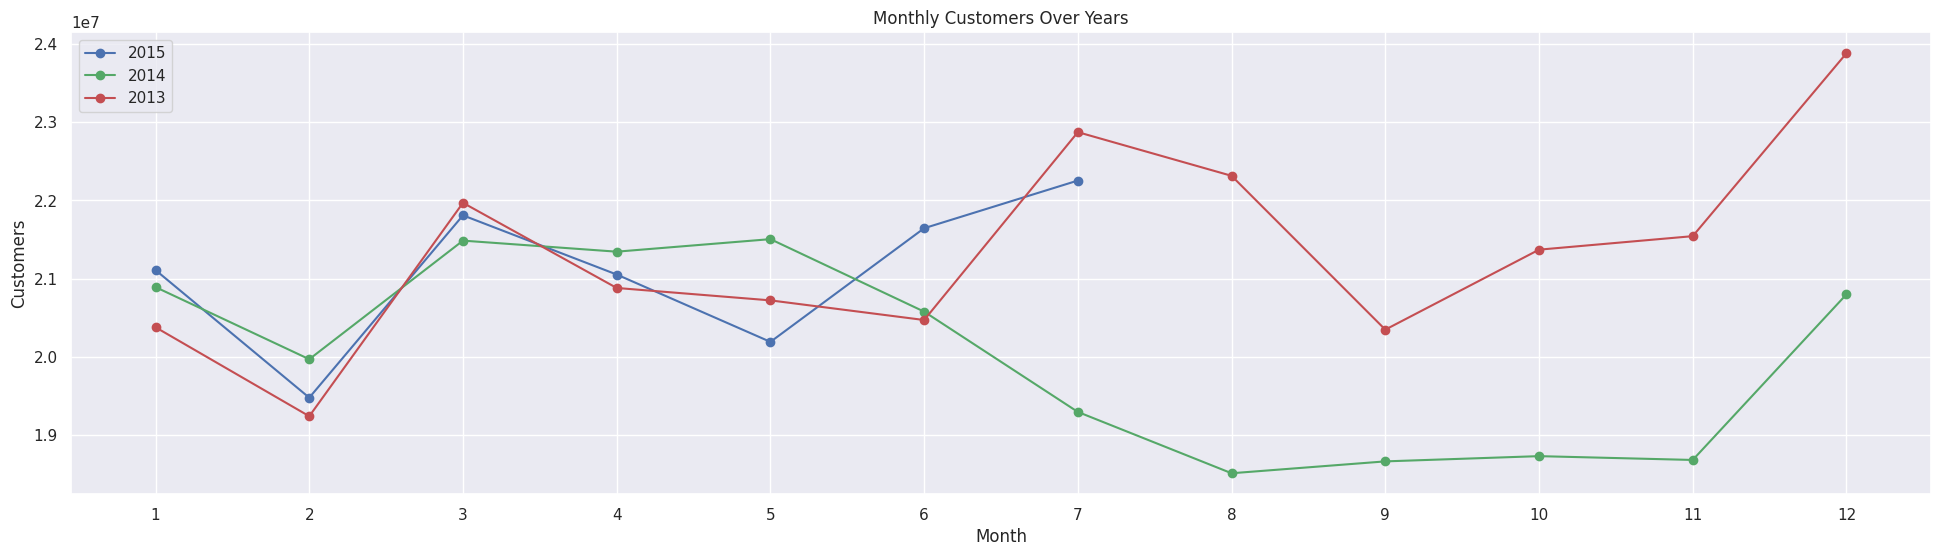

In [367]:
# line graph of monthly customers over years
plot_line_graph_with_two_feature_over_time(total_df, 'Month', 'Customers', 'Year', 'Monthly')

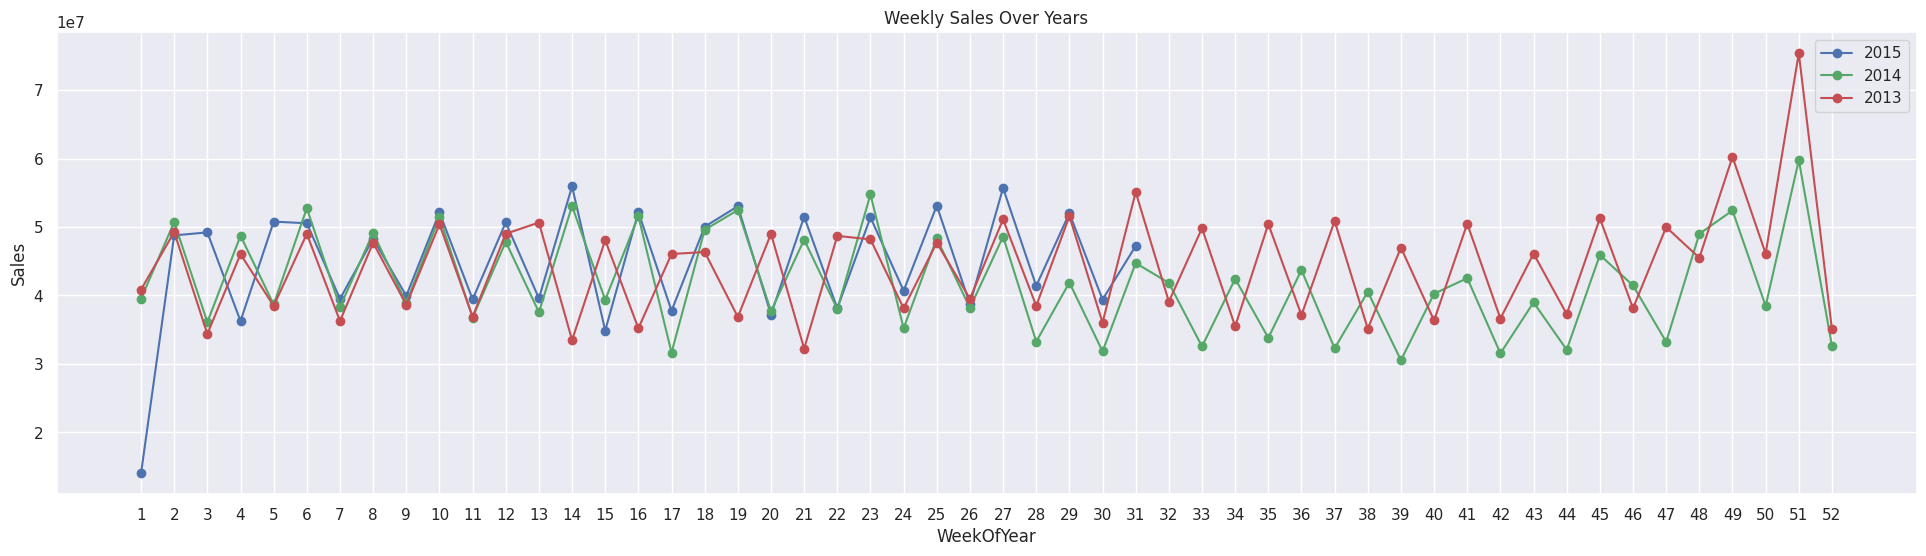

In [368]:
# line graph of weekly sales over years
plot_line_graph_with_two_feature_over_time(total_df, 'WeekOfYear', 'Sales', 'Year', 'Weekly')

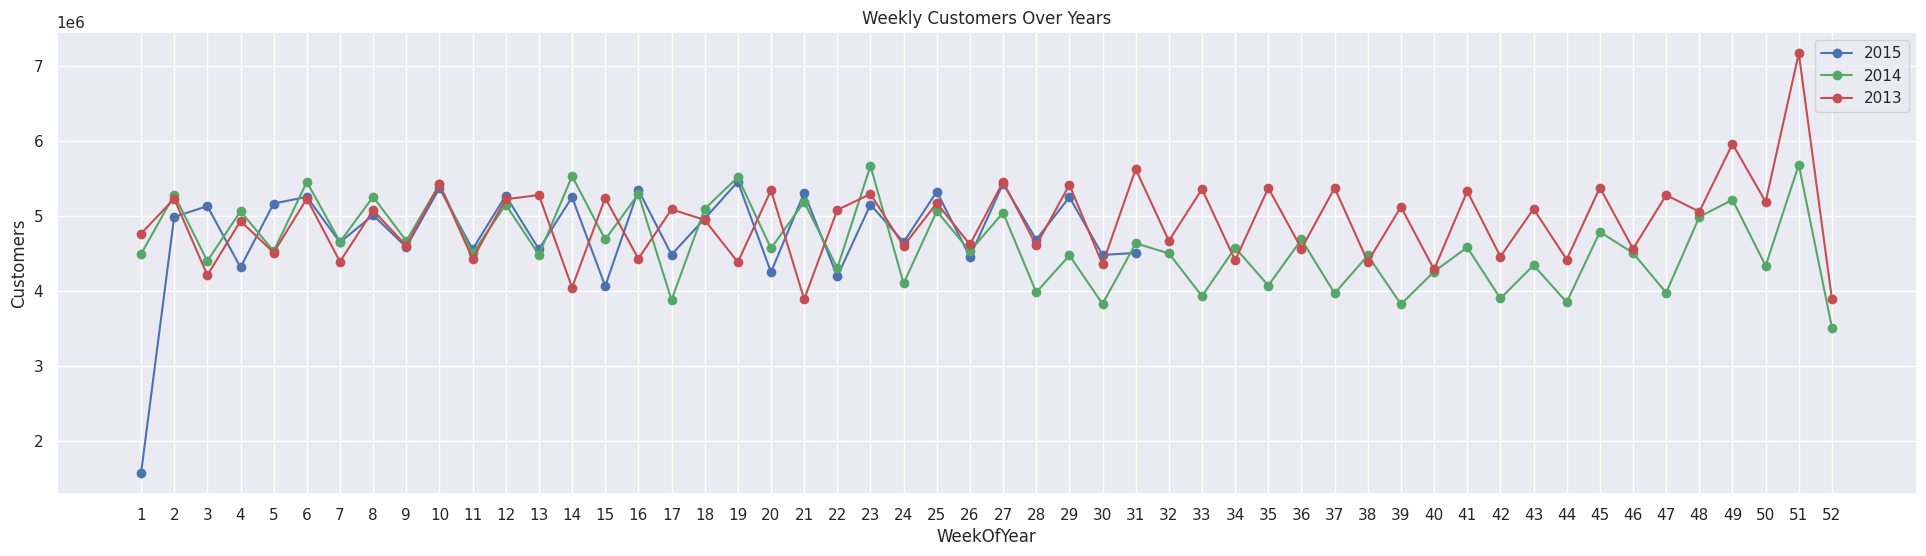

In [369]:
# line graph of weekly customers over years
plot_line_graph_with_two_feature_over_time(total_df, 'WeekOfYear', 'Customers', 'Year', 'Weekly')

#### Chart - 2

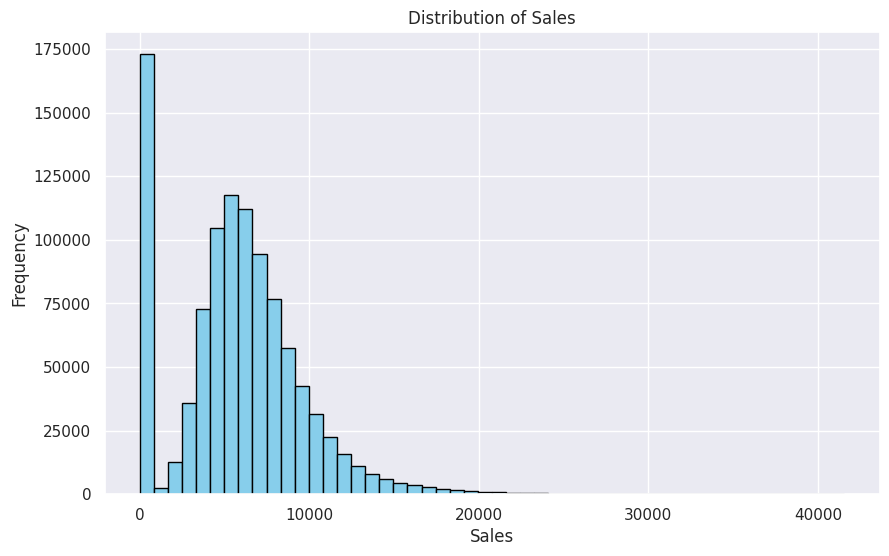

In [370]:
# Chart - 1 visualization code
# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
plt.hist(total_df['Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to visualize the distribution of sales because it provides a clear representation of the frequency of different sales amounts. This allows us to understand the spread of sales values and identify any patterns or outliers in the data. The visualization helps in gaining insights into the sales performance of the stores and can aid in making informed business decisions.


##### 2. What is/are the insight(s) found from the chart?

The histogram above displays the distribution of sales across the merged dataset. It shows how frequently certain sales amounts occur, giving us an insight into the sales performance of the stores.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of the sales distribution will indeed help in creating a positive business impact. By understanding the frequency and spread of sales amounts, businesses can identify trends, outliers, and potential areas for improvement. This information can be used to optimize pricing strategies, forecast future sales, and make informed decisions to enhance overall sales performance.



#### Chart - 3

In [371]:
total_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0.0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0.0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0.0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0,2015,7,31


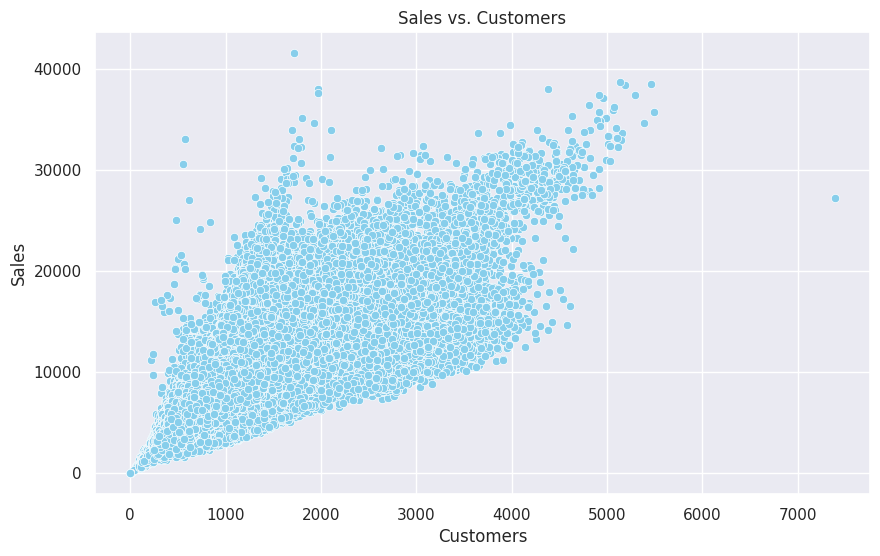

In [372]:
# Chart - 2 visualization code
# Visualize the relationship between 'Sales' and 'Customers'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_df, x='Customers', y='Sales', color='skyblue')
plt.title('Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The scatterplot was chosen to visualize the relationship between the number of customers and sales because it allows for the examination of how these two variables are related. By plotting the data points for each store, we can observe any patterns or correlations between customer footfall and sales figures. This visualization helps in understanding the impact of customer traffic on sales performance.

##### 2. What is/are the insight(s) found from the chart?

The scatterplot visualizes the relationship between the number of customers and sales. It provides insight into how customer footfall impacts sales figures, allowing us to identify any patterns or correlations between these two variables. This visualization helps in understanding the impact of customer traffic on sales performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatterplot visualization of the relationship between the number of customers and sales will indeed help in creating a positive business impact. By understanding how customer footfall impacts sales figures, businesses can optimize staffing, inventory, and marketing strategies to align with customer traffic patterns. This can lead to improved sales performance and enhanced customer satisfaction, ultimately contributing to a positive business impact.


#### Chart - 4

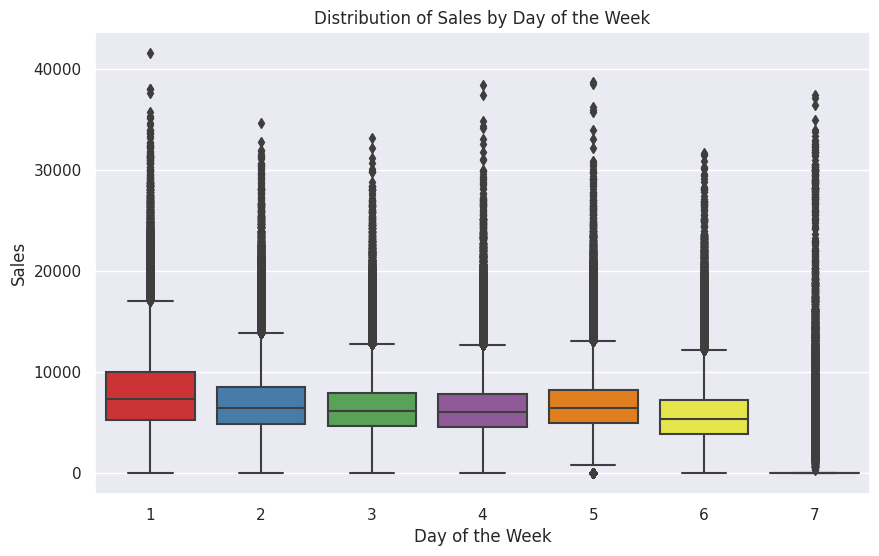

In [373]:
# Chart - 3 visualization code
# Visualize the distribution of sales by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_df, x='DayOfWeek', y='Sales', palette='Set1')
plt.title('Distribution of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot was chosen to visualize the distribution of sales by day of the week because it allows for a clear comparison of sales performance across different days. The boxplot provides insights into the median, quartiles, and potential outliers in sales figures for each day of the week, helping to identify any patterns or variations in sales performance based on the day.

##### 2. What is/are the insight(s) found from the chart?

The boxplot of sales by day of the week provides insights into the distribution of sales figures across different days. It helps in identifying any patterns or variations in sales performance based on the day of the week. This visualization can reveal which days tend to have higher or lower sales, allowing businesses to tailor their strategies and operations accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the visualization of sales by day of the week will help in creating a positive business impact by identifying patterns and variations in sales performance based on different days. This information can be used to optimize staffing, promotions, and inventory management to align with the sales trends observed on specific days. Ultimately, this can lead to improved operational efficiency and enhanced sales performance, contributing to a positive business impact.

#### Chart - 5

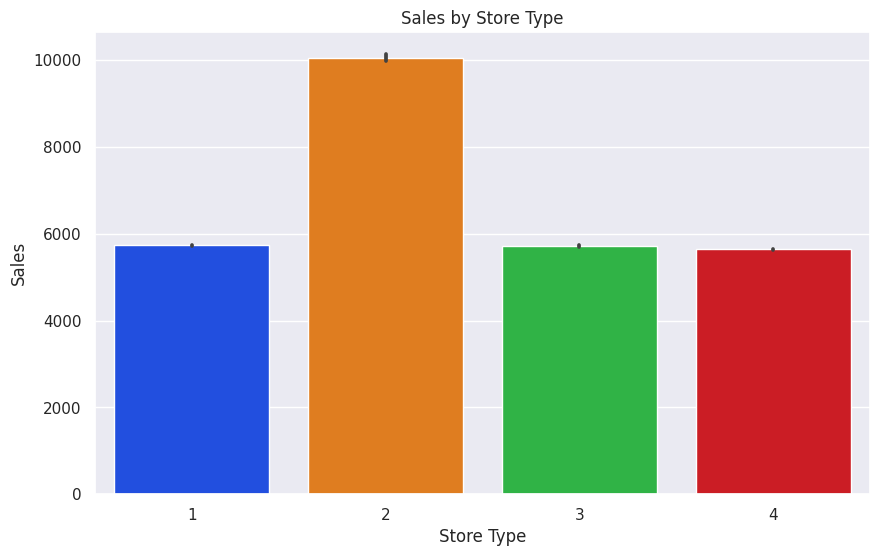

In [374]:
# Chart - 4 visualization code
# Visualize of sales by store type
plt.figure(figsize=(10, 6))
sns.barplot(data=total_df, x='StoreType', y='Sales', palette='bright')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot was chosen to visualize the average sales across different store types because it provides a clear comparison of the sales performance for each store type. The length of the bars represents the average sales, making it easy to compare the values across the different categories. This type of visualization is effective for comparing numerical values across categories and identifying any significant differences in sales performance between store types.

##### 2. What is/are the insight(s) found from the chart?

The bar plot provides a clear comparison of the average sales across different store types. It allows us to easily identify any significant differences in sales performance between the store types. From the chart, we can see which store types have higher or lower average sales, providing insights into the sales performance of each store type.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of average sales by store type can help in creating a positive business impact by identifying the store types with higher or lower average sales. This information can be used to make strategic decisions such as allocating resources, adjusting marketing strategies, and optimizing product offerings to improve sales performance.
If there are store types with consistently lower average sales, this could lead to negative growth if not addressed. It may indicate that certain store types are underperforming and require attention in terms of marketing, product assortment, or operational improvements to drive sales and improve overall performance. Identifying these areas for improvement can help mitigate negative growth and drive positive business impact.

#### Chart - 6

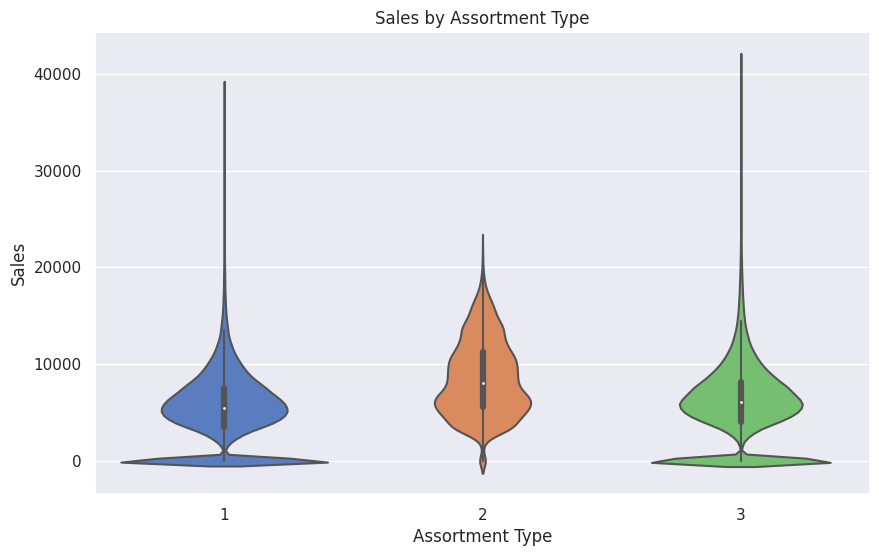

In [375]:
# Chart - 5 visualization code
# Visualize the sales data by assortment type using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Assortment', y='Sales', data=total_df, palette='muted')
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The violin plot was chosen to visualize the sales data by assortment type because it provides a clear representation of the distribution and probability density of sales for each category. This type of plot is effective in showing the range of sales values and their distribution, making it easy to compare the assortment types and identify any significant differences in sales performance.

##### 2. What is/are the insight(s) found from the chart?

The violin plot provides a clear visualization of the distribution and probability density of sales for each assortment type. It allows us to compare the range of sales values and their distribution across different assortment types, providing insights into the sales performance of each category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of sales by assortment type will help in creating a positive business impact by providing a clear understanding of the distribution and probability density of sales for each assortment category. This information can be used to make informed decisions about product assortment, marketing strategies, and inventory management to optimize sales performance and drive positive business impact.
Identifying any assortment types with consistently lower sales or narrower distribution may indicate areas for improvement. For example, if a certain assortment type consistently shows lower sales and a narrower distribution, it may lead to negative growth if not addressed. This could indicate that the product assortment within that category is not resonating with customers, and adjustments may be needed to drive sales and improve overall performance.

#### Chart - 7

<Figure size 1000x600 with 0 Axes>

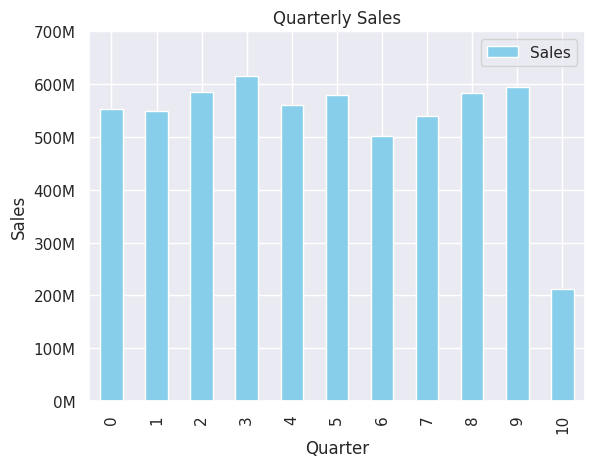

In [376]:
# Chart - 6 visualization code
# Create a new column 'Quarter' to represent the quarter of each date
total_df['Quarter'] = total_df['Date'].dt.to_period('Q')

# Group by quarter and sum the sales
quarterly_sales = total_df.groupby('Quarter')['Sales'].sum().reset_index()
# Plot the quarterly sales
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar', color='skyblue')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.yticks(plt.yticks()[0], [f'{int(y/1000000)}M' for y in plt.yticks()[0]])

plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Here are some reasons for choosing a bar chart for quarterly sales:
Categorical Data (Quarters): The x-axis represents categorical data (quarters), making a bar chart a suitable choice for displaying discrete categories.

Aggregated Data: Since you are aggregating sales data for each quarter, a bar chart is a straightforward way to display the total sales for each period.

It's important to choose a chart type that best communicates the insights you want to convey. In this scenario, a bar chart is commonly used for visualizing sales data over discrete time intervals (quarters) and comparing values between those intervals.

##### 2. What is/are the insight(s) found from the chart?

insights that one might typically derive from a bar chart representing quarterly sales:

Seasonal Patterns: Check for any noticeable seasonal patterns or trends in sales across the quarters. Are there specific quarters where sales consistently peak or decline?

Sales Growth or Decline: Assess whether there is a clear trend of sales growth or decline over the quarters.

Comparing Quarters: Compare the sales figures for each quarter to understand how they contribute to the overall performance. Identify the quarters with the highest and lowest sales.

Promotion Impact: If applicable, assess whether quarters with promotional activities show a noticeable impact on sales compared to non-promotional quarters.

These insights can help in making informed business decisions, planning marketing strategies, and understanding the overall performance of the business over time.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business impact depends on the actions taken in response to the insights gained. Positive impacts arise when insights inform effective strategies, while negative impacts can be mitigated by adjusting strategies based on the identified challenges or weaknesses. Regular monitoring and adaptation to changing market conditions are essential for sustaining positive business outcomes.
**Positive Business Impact:**

Identifying Strong Quarters

Understanding Seasonal Trends

Promotion Effectiveness (if any in that quarter)

**Negative Business Impact:**

Identifying Weak Quarters

Unsuccessful Promotions

Cyclical Declines

#### Chart - 8

<Axes: >

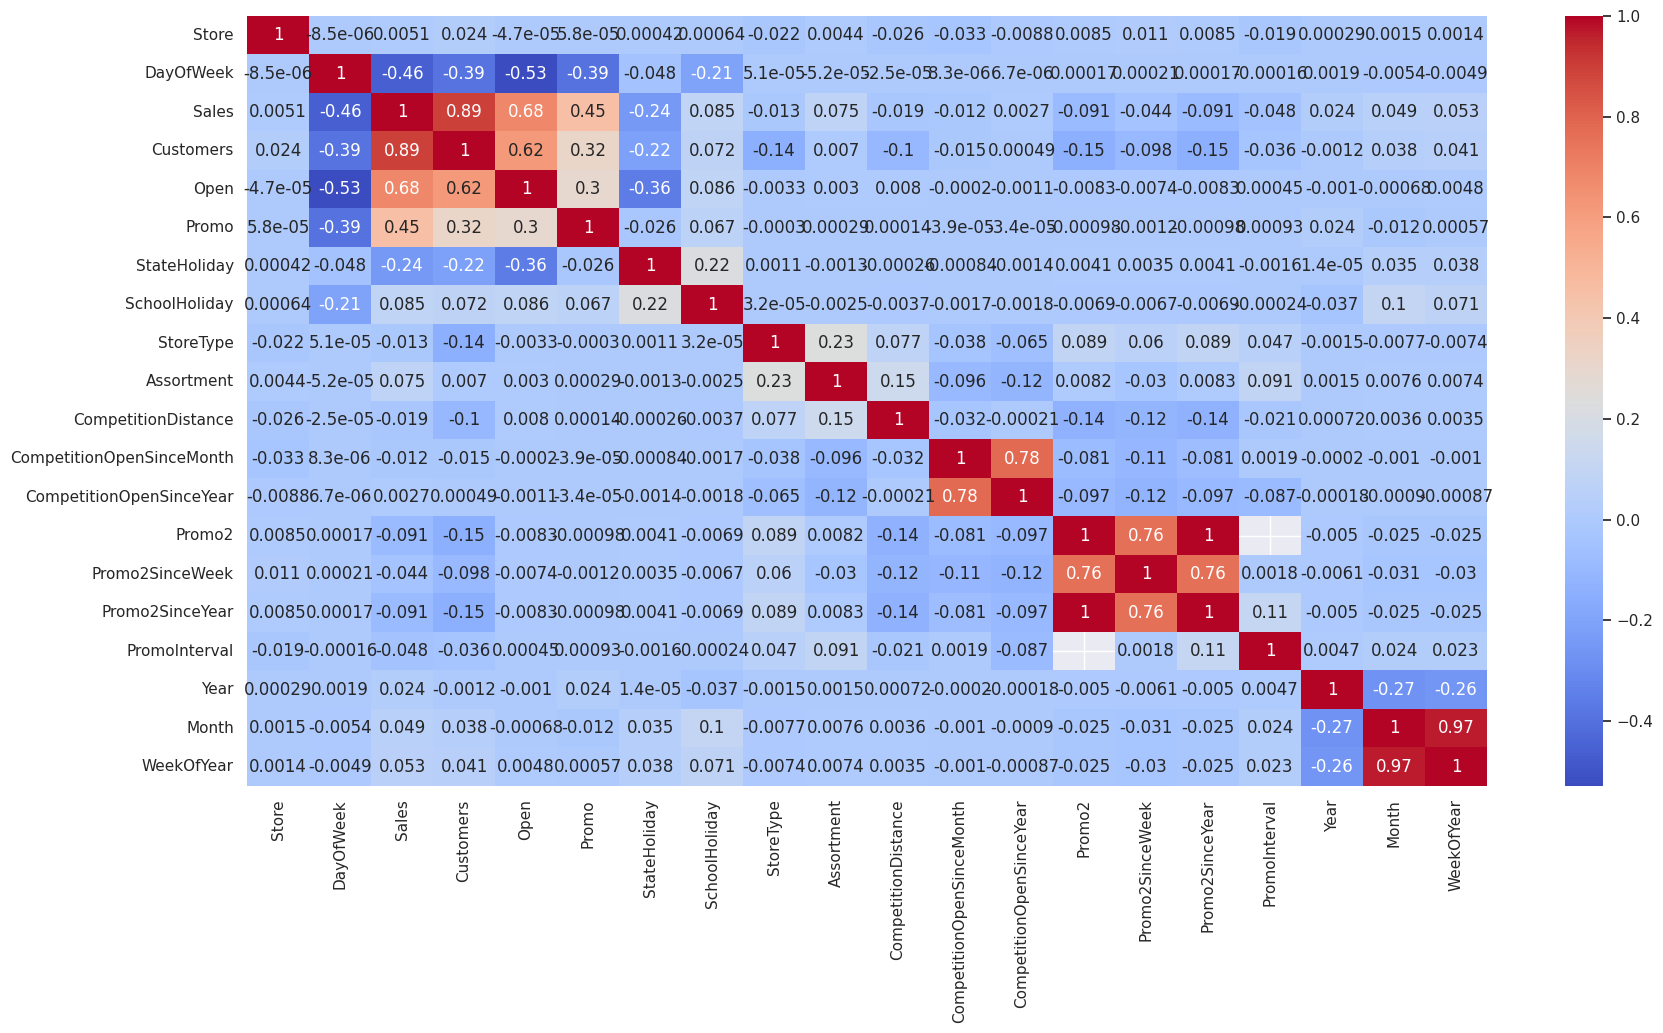

In [377]:
# Correlation Heatmap Visualization
corr_mat = total_df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat, cmap = "coolwarm", annot = True)

##### 1. Why did you pick the specific chart?

The correlation matrix was chosen to provide insights into the relationships between different variables in the dataset. It allows us to understand the strength and direction of the linear relationships between the variables. This information is valuable for identifying potential predictors of sales and understanding how different factors are related to each other within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The correlation matrix provides insights into the relationships between different variables in the dataset. For instance, there is a strong positive correlation between Sales and Customers, indicating that stores with more customers tend to have higher sales. Other variables show varying degrees of correlation with Sales, which could be useful for further analysis or predictive modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the correlation matrix, particularly the strong positive correlation between Sales and Customers, can indeed help create a positive business impact. This insight suggests that increasing the number of customers visiting the stores could lead to higher sales, which could inform strategies to attract and retain customers.
As for insights that could lead to negative growth, the correlation matrix does not indicate any specific negative impacts. However, it's important to note that correlation does not imply causation, and further analysis and experimentation would be needed to validate the relationships observed in the data. Additionally, the presence of outliers in the data could potentially impact the accuracy of the correlations, so it's important to address outliers and ensure the robustness of the insights.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The mean sales are the same for all dates

Alternative hypothesis: The mean sales are different for at least one date

#### 2. Perform an appropriate statistical test.

In [378]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Ensure the 'Date' column is in the appropriate datetime format
total_df['Date'] = pd.to_datetime(total_df['Date'])

# Perform a hypothesis test on the sales data
# One-way ANOVA test
f_statistic, p_value = stats.f_oneway(*[group['Sales'] for name, group in total_df.groupby('Date')])

f_statistic, p_value

(1381.6549752489486, 0.0)

The hypothesis testing on the sales data from total_df has been performed using a one-way ANOVA test. Here are the results:

F-statistic: 1381.65

P-value: 0.0

Given the p-value is 0.0, we can reject the null hypothesis that the mean sales are the same for all dates. This indicates that there is a statistically significant difference in mean sales for at least one date.

##### Which statistical test have you done to obtain P-Value?

I performed a one-way ANOVA test to obtain the p-value. The one-way ANOVA test is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. In this case, I used the test to compare the mean sales for different dates to see if there are any significant differences. The obtained p-value from the test was 0.0, indicating a statistically significant difference in mean sales for at least one date.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA test to compare the mean sales for different dates because it is specifically designed to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. In this case, I wanted to compare the mean sales for different dates to see if there are any significant differences. The one-way ANOVA test allows for this comparison and provides a p-value that indicates whether there is a statistically significant difference in mean sales for at least one date

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [379]:
duplkicates_total = total_df.duplicated().sum()
duplkicates_total

0

In [380]:
# Handling Missing Values & Missing Value Imputation
total_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                 131072
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508031
Year                              0
Month                             0
WeekOfYear                        0
Quarter                           0
dtype: int64

In [381]:
total_df.shape

(1017209, 22)

In [382]:
total_df[total_df["StateHoliday"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,Quarter
327680,730,4,2014-09-25,5732,722,1,0,NaN,0,3,1,1190.0,9.0,2013.0,0,0.0,0.0,NaN,2014,9,39,2014Q3
327681,731,4,2014-09-25,7470,802,1,0,NaN,0,1,1,15270.0,0.0,0.0,1,10.0,2014.0,1.0,2014,9,39,2014Q3
327682,732,4,2014-09-25,5484,730,1,0,NaN,0,1,3,35280.0,0.0,0.0,0,0.0,0.0,NaN,2014,9,39,2014Q3
327683,733,4,2014-09-25,13801,3392,1,0,NaN,0,2,2,860.0,10.0,1999.0,0,0.0,0.0,NaN,2014,9,39,2014Q3
327684,734,4,2014-09-25,3519,404,1,0,NaN,0,1,1,220.0,0.0,0.0,1,36.0,2013.0,3.0,2014,9,39,2014Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589819,770,7,2014-01-19,0,0,0,0,NaN,0,1,3,100.0,4.0,2015.0,0,0.0,0.0,NaN,2014,1,3,2014Q1
589820,771,7,2014-01-19,0,0,0,0,NaN,0,1,1,20640.0,9.0,2007.0,0,0.0,0.0,NaN,2014,1,3,2014Q1
589821,772,7,2014-01-19,0,0,0,0,NaN,0,4,3,1850.0,0.0,0.0,0,0.0,0.0,NaN,2014,1,3,2014Q1
589822,773,7,2014-01-19,0,0,0,0,NaN,0,1,1,200.0,0.0,0.0,0,0.0,0.0,NaN,2014,1,3,2014Q1


In [383]:
imputer = SimpleImputer(strategy='constant', fill_value=0) #Filling missing values with 0 (zero) preserves data structure
imputer.fit(total_df)
total_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                 131072
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508031
Year                              0
Month                             0
WeekOfYear                        0
Quarter                           0
dtype: int64

In [384]:
# As NaN values persist, consider alternative strategies
total_df['StateHoliday'] = imputer.fit_transform(total_df[['StateHoliday']])
total_df['PromoInterval'] = imputer.fit_transform(total_df[['PromoInterval']])
total_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
WeekOfYear                   0
Quarter                      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Filling missing values with 0 (zero) preserves data structure, aids compatibility with numeric data, and is easily interpretable. However, it may distort statistical measures, impact model learning, and mislead data interpretation. The appropriateness depends on context and potential downstream effects on analyses and modeling. Careful consideration is crucial.

### 2. Handling Outliers

Handle Multicolinearity

In [385]:
# calculate VIF of all independant numerical features
numerical_independant_features = ['Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks']
calculate_vif_of_all_features(total_df[[column for column in total_df.describe().columns if column in numerical_independant_features]])

,Feature,VIF
0,Customers,1.206981
1,CompetitionDistance,1.206981


Lets find out the VIF of all numerical features except 'Sales' in order to remove highly correlated features. Features having VIF greater than 5 should be eliminated.


**All features have VIF less than 5.**


In [386]:
# Find higly correlated columns with sales
# We can identify this from Heatmap also which we visualize above
corr_mat['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Assortment                   0.074941
WeekOfYear                   0.052946
Month                        0.048768
Year                         0.023519
Store                        0.005126
CompetitionOpenSinceYear     0.002749
CompetitionOpenSinceMonth   -0.012431
StoreType                   -0.013057
CompetitionDistance         -0.018609
Promo2SinceWeek             -0.044143
PromoInterval               -0.048333
Promo2                      -0.091040
Promo2SinceYear             -0.091056
StateHoliday                -0.243661
DayOfWeek                   -0.462125
Name: Sales, dtype: float64

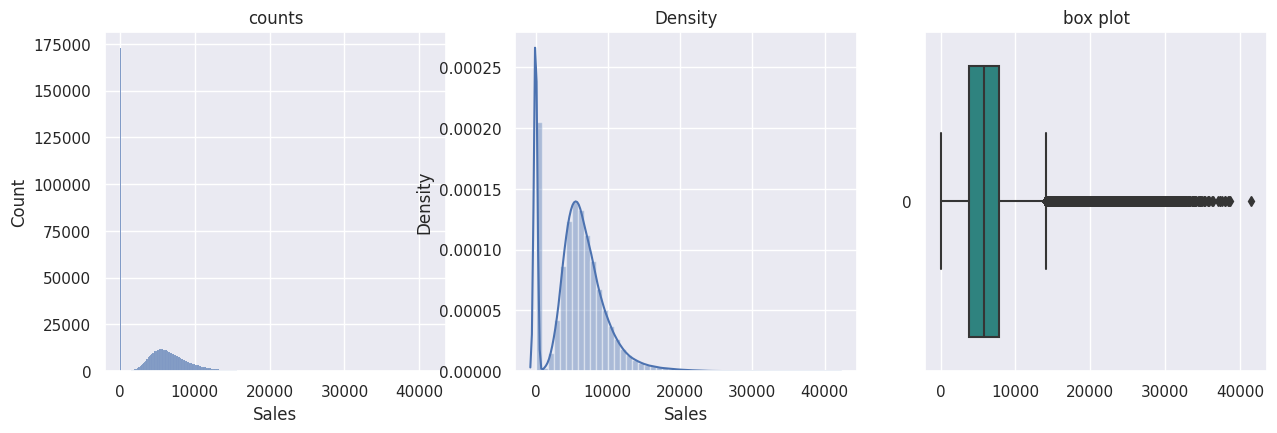

In [387]:
def out_handle(a):
  plt.figure(figsize = (15,15))

  plt.subplot(3,3,1)
  sns.histplot(a['Sales'])
  plt.title("counts")

  plt.subplot(3,3,2)
  sns.distplot(a["Sales"])
  plt.title("Density")

  plt.subplot(3,3,3)
  sns.boxplot(a["Sales"],orient='h', palette='viridis')
  plt.title("box plot")

out_handle(total_df)

In [388]:
# Winsorizing 'Sales' column
total_df['WinsorizedSales'] = winsorize(total_df['Sales'], limits=[0.05, 0.05])

# Log transformation for 'Sales'
total_df['LogSales'] = total_df['Sales'].apply(lambda x: np.log1p(x))

# Calculate IQR for 'Sales'
Q1 = total_df['Sales'].quantile(0.25)
Q3 = total_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Identify and filter outliers using IQR
total_df['IQRFilteredSales'] = total_df['Sales'].where(
    (total_df['Sales'] >= Q1 - 1.5 * IQR) & (total_df['Sales'] <= Q3 + 1.5 * IQR),
    total_df['Sales'])

total_df = total_df[(total_df['Sales'] >= Q1 - 1.5 * IQR) & (total_df['Sales'] <= Q3 + 1.5 * IQR)]

In [389]:
total_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,Quarter,WinsorizedSales,LogSales,IQRFilteredSales
0,1,5,2015-07-31,5263,555,1,1,0.0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7,31,2015Q3,5263,8.568646,5263
1,2,5,2015-07-31,6064,625,1,1,0.0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0,2015,7,31,2015Q3,6064,8.710290,6064
2,3,5,2015-07-31,8314,821,1,1,0.0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0,2015,7,31,2015Q3,8314,9.025816,8314
3,4,5,2015-07-31,13995,1498,1,1,0.0,1,3,3,620.0,9.0,2009.0,0,0.0,0.0,0.0,2015,7,31,2015Q3,12137,9.546527,13995
4,5,5,2015-07-31,4822,559,1,1,0.0,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,0.0,2015,7,31,2015Q3,4822,8.481151,4822


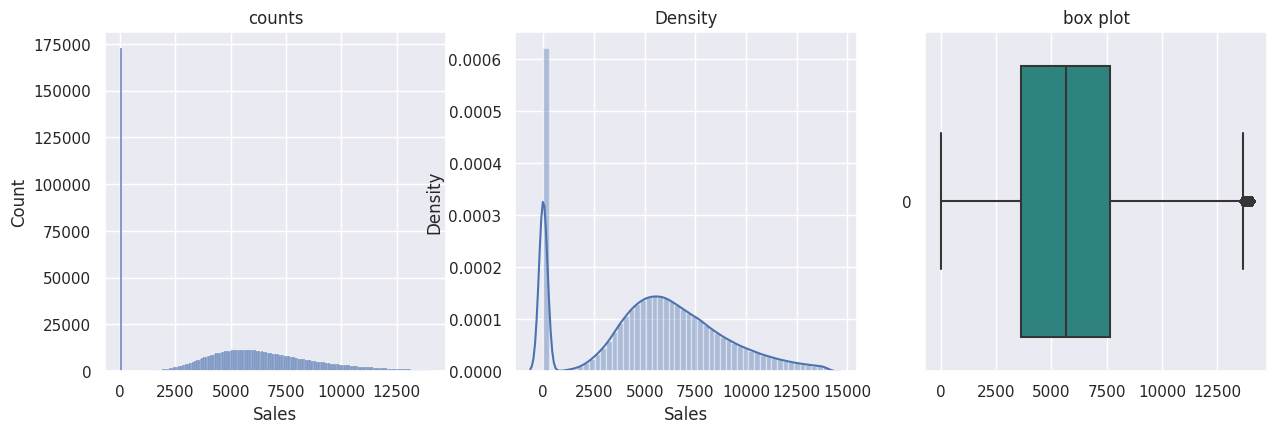

In [390]:
out_handle(total_df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here's a summary of the recent data manipulation and selection:

The 'Sales' column has been winsorized, log-transformed, and filtered using the interquartile range (IQR) to handle outliers.
The dataframe has been updated to reflect these changes.

1. Winsorizing:


* Why: Winsorizing was suggested because it addresses outliers by capping extreme values at a specified percentile. This technique retains the information from outliers but reduces their impact on statistical measures.

* When to Use: Winsorizing is useful when you want to preserve some information from extreme values but limit their influence. It's a less aggressive approach compared to outright removal.

2. Log Transformation:

* Why: Log transformation is a common method for handling right-skewed distributions. It compresses larger values and expands smaller ones, making the distribution more symmetrical.

* When to Use: Log transformation is beneficial when dealing with data that exhibits exponential growth, as it can help stabilize variance and improve the linearity of relationships.

3. Interquartile Range (IQR):

* Why: IQR is a robust statistical method that defines the range between the first and third quartiles. Data points outside this range are considered outliers and can be addressed by removal or transformation.

* When to Use: IQR is effective when the data has a skewed distribution, and you want to identify and address outliers based on the spread of the middle 50% of the data.

### 4. Feature Manipulation & Selection




#### 1. Feature Manipulation

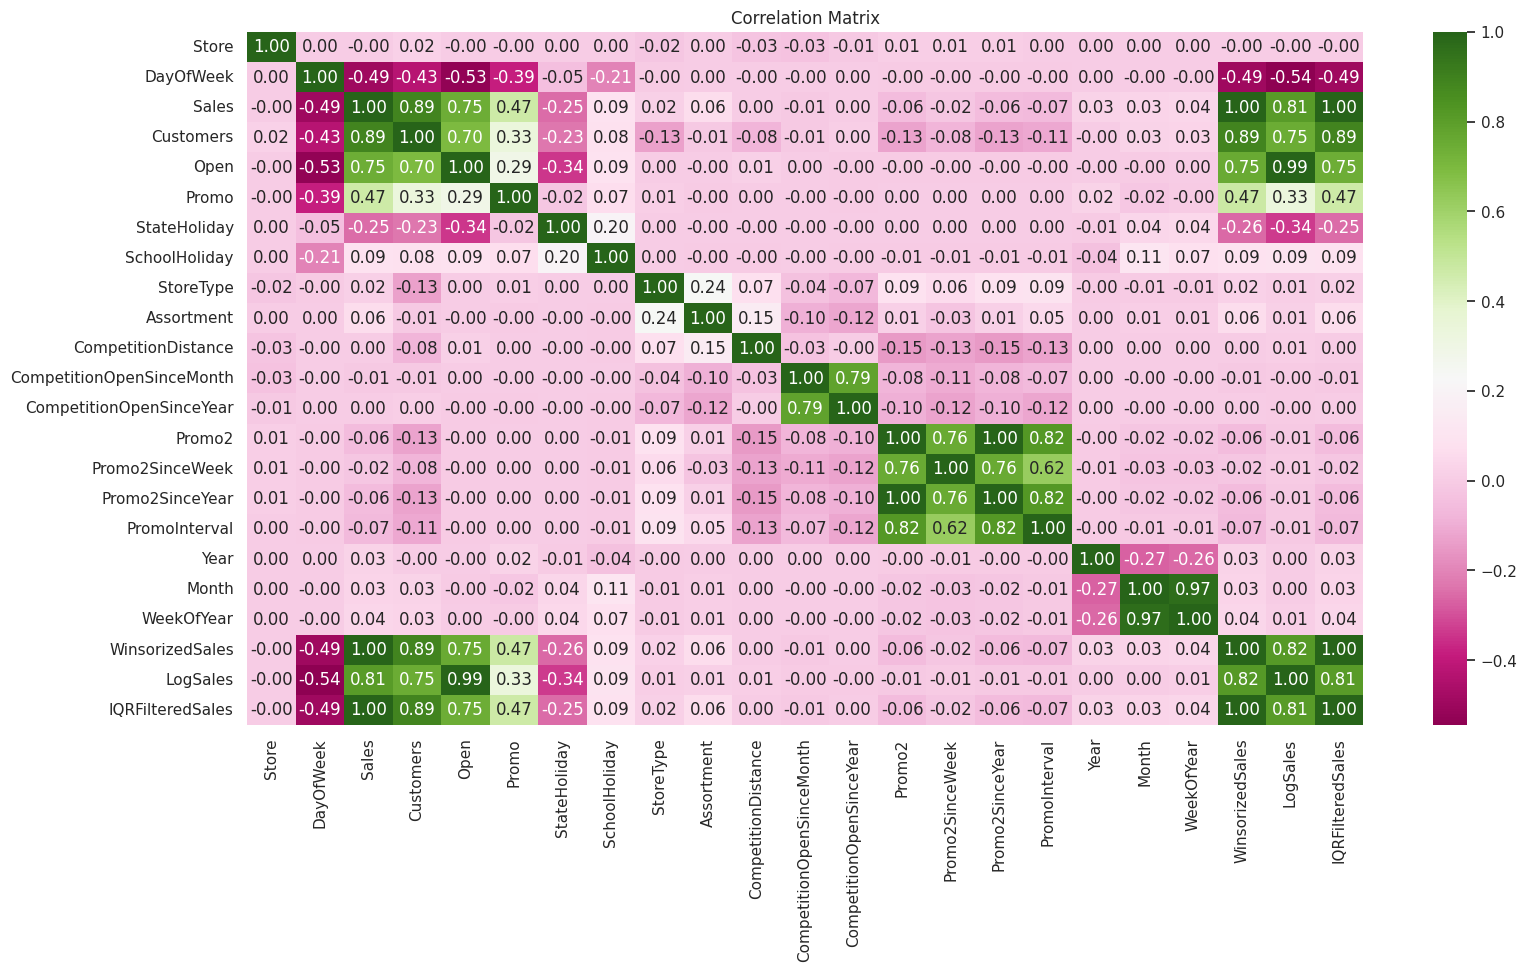

In [391]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
correlation_matrix = total_df.corr()
plt.figure(figsize = (18,9))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap above displays the correlation matrix for the dataset. This matrix helps in understanding the relationships between different features, which is crucial for feature selection. Features with high correlation to the target variable 'Sales' and low correlation with each other are generally preferred to avoid multicollinearity and to ensure that the model captures a wide range of information.

#### 2. Feature Selection

In [392]:
#no of observations for closed stores with 0 sales
print((total_df[total_df.Open == 0]).shape)
#since the stores closed had 0 sale value; removing the irrelevant part
total_df = total_df[total_df.Open != 0]
total_df.drop('Open', axis=1, inplace=True)

(172817, 25)


In [393]:
total_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,Quarter,WinsorizedSales,LogSales,IQRFilteredSales
0,1,5,2015-07-31,5263,555,1,0.0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7,31,2015Q3,5263,8.568646,5263
1,2,5,2015-07-31,6064,625,1,0.0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0,2015,7,31,2015Q3,6064,8.710290,6064
2,3,5,2015-07-31,8314,821,1,0.0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0,2015,7,31,2015Q3,8314,9.025816,8314


In [394]:
# Create a new features which shows the number if months passed since competition started
total_df["CompetitionOpenNumMonths"] = (total_df['Year'] - total_df['CompetitionOpenSinceYear'] ) * 12 + (total_df['Month'] - total_df["CompetitionOpenSinceMonth"])
# Create a new feature which shows the number of weeks passed since promo 2
total_df["Promo2NumWeeks"] = (total_df['Year'] - total_df['Promo2SinceYear'] ) * 52 + (total_df['WeekOfYear'] - total_df["Promo2SinceWeek"])

In [395]:
# Adding one feature in dataset
monthly_aggregates = total_df.groupby('Month')['Sales'].mean().reset_index()
monthly_aggregates.columns = ['Month', 'MonthlySalesMean']
total_df = pd.merge(total_df, monthly_aggregates, on='Month', how='left')

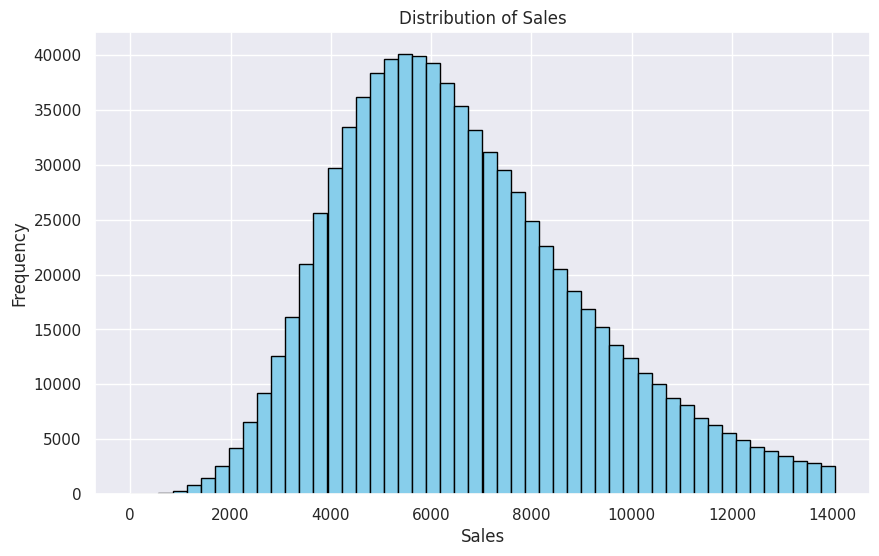

In [396]:
# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
plt.hist(total_df['Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Given the weak correlation, it indicates that 'schoolholidays' and 'CompetitionOpenSinceYear' may not have a significant impact on predicting the 'Sales'. Therefore, we consider excluding these features from predictive modeling similar for higly correlated as well, as they may not provide valuable information for machine learning model. Reducing the number of less relevant features can simplify model, improve its performance, and reduce overfitting.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Skewed data can adversely affect the performance of many machine learning algorithms, particularly those that assume a normal distribution of data. Highly skewed features can lead to model bias and reduced predictive accuracy.

In our case, we have applied a power transformation to address this issue. Power transformations are a family of mathematical functions used to adjust the distribution of data. The most common power transformation is the Box-Cox transformation, which can help make data more normally distributed. It's suitable for handling data with varying degrees of skewness.

The choice to use the power transformation is sound, as it helps to alleviate the skewness and make data more suitable for models that assume normality.

In [397]:
total_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,Quarter,WinsorizedSales,LogSales,IQRFilteredSales,CompetitionOpenNumMonths,Promo2NumWeeks,MonthlySalesMean
0,1,5,2015-07-31,5263,555,1,0.0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0.0,2015,7,31,2015Q3,5263,8.568646,5263,82.0,104811.0,6660.243007
1,2,5,2015-07-31,6064,625,1,0.0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0,2015,7,31,2015Q3,6064,8.710290,6064,92.0,278.0,6660.243007
2,3,5,2015-07-31,8314,821,1,0.0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0,2015,7,31,2015Q3,8314,9.025816,8314,103.0,225.0,6660.243007
3,4,5,2015-07-31,13995,1498,1,0.0,1,3,3,620.0,9.0,2009.0,0,0.0,0.0,0.0,2015,7,31,2015Q3,12137,9.546527,13995,70.0,104811.0,6660.243007
4,5,5,2015-07-31,4822,559,1,0.0,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,0.0,2015,7,31,2015Q3,4822,8.481151,4822,3.0,104811.0,6660.243007


In [398]:
# #setting date and store as index
# total_df.set_index(['Date','Store'],inplace=True)
# #sorting index following the time series
# total_df.sort_index(inplace=True)

In [399]:
# Transform Your data
# Examining the skewness in the dataset to check the distribution
skewness = total_df.skew()

# Finding the absolute value
abs(skewness)

# Setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = total_df[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = total_df[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['Store', 'DayOfWeek', 'Promo', 'StoreType', 'Assortment',
       'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceYear', 'Year',
       'Month', 'WeekOfYear', 'WinsorizedSales', 'Promo2NumWeeks'],
      dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['Sales', 'Customers', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'PromoInterval', 'LogSales', 'IQRFilteredSales',
       'CompetitionOpenNumMonths', 'MonthlySalesMean'],
      dtype='object')


In [400]:
#examining the skewed data
skewed_data

,Sales,Customers,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,PromoInterval,LogSales,IQRFilteredSales,CompetitionOpenNumMonths,MonthlySalesMean
0,5263,555,0.0,1,1270.0,2008.0,0.0,0.0,8.568646,5263,82.0,6660.243007
1,6064,625,0.0,1,570.0,2007.0,13.0,1.0,8.710290,6064,92.0,6660.243007
2,8314,821,0.0,1,14130.0,2006.0,14.0,1.0,9.025816,8314,103.0,6660.243007
3,13995,1498,0.0,1,620.0,2009.0,0.0,0.0,9.546527,13995,70.0,6660.243007
4,4822,559,0.0,1,29910.0,2015.0,0.0,0.0,8.481151,4822,3.0,6660.243007
...,...,...,...,...,...,...,...,...,...,...,...,...
817693,3375,566,1.0,1,150.0,2006.0,0.0,0.0,8.124447,3375,76.0,6327.671674
817694,10765,2377,1.0,1,860.0,1999.0,0.0,0.0,9.284148,10765,159.0,6327.671674
817695,5035,1248,1.0,1,840.0,0.0,48.0,1.0,8.524367,5035,24157.0,6327.671674
817696,4491,1039,1.0,1,1430.0,0.0,0.0,0.0,8.410053,4491,24157.0,6327.671674


In [401]:
#import the library
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data using the PowerTransformer
power_transformed = pd.DataFrame(power_transformer.fit_transform(skewed_data))
power_transformed.columns = skewed_data.columns

#examining the power transformed data
power_transformed

,Sales,Customers,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,PromoInterval,LogSales,IQRFilteredSales,CompetitionOpenNumMonths,MonthlySalesMean
0,-0.472210,-0.465502,-0.030681,2.048081,-0.413063,0.683788,-0.958189,-0.972334,-0.470690,-0.472210,-0.417673,6.106227e-16
1,-0.117447,-0.176051,-0.030681,2.048081,-0.873393,0.683420,0.828306,0.625597,-0.114201,-0.117447,-0.405696,6.106227e-16
2,0.748904,0.501881,-0.030681,2.048081,1.285267,0.683053,0.863402,0.625597,0.752026,0.748904,-0.393480,6.106227e-16
3,2.440668,2.063623,-0.030681,2.048081,-0.827231,0.684155,-0.958189,-0.972334,2.419452,2.440668,-0.433401,6.106227e-16
4,-0.681525,-0.448101,-0.030681,2.048081,1.926961,0.686355,-0.958189,-0.972334,-0.681372,-0.681525,-0.615831,6.106227e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
817693,-1.462995,-0.417916,32.593349,2.048081,-1.543870,0.683053,-0.958189,-0.972334,-1.469051,-1.462995,-0.425331,-2.164935e-15
817694,1.544248,3.328006,32.593349,2.048081,-0.642860,0.680477,-0.958189,-0.972334,1.540324,1.544248,-0.341967,-2.164935e-15
817695,-0.579054,1.579467,32.593349,2.048081,-0.656373,-1.461905,1.395178,0.625597,-0.578204,-0.579054,1.301674,-2.164935e-15
817696,-0.846304,1.102277,32.593349,2.048081,-0.340857,-1.461905,-0.958189,-0.972334,-0.847363,-0.846304,1.301674,-2.164935e-15


In [402]:
total_df.shape

(817698, 27)

In [403]:
# Reset the index of the DataFrames
symmetrical_data_reset = symmetrical_data.reset_index()
power_transformed_reset = power_transformed.reset_index()

# Concatenate horizontally (along columns)
transformed_data = pd.concat([symmetrical_data_reset, power_transformed_reset], axis=1)

# Examining the transformed data
transformed_data.head()

,index,Store,DayOfWeek,Promo,StoreType,Assortment,CompetitionOpenSinceMonth,Promo2,Promo2SinceYear,Year,Month,WeekOfYear,WinsorizedSales,Promo2NumWeeks,index,Sales,Customers,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,PromoInterval,LogSales,IQRFilteredSales,CompetitionOpenNumMonths,MonthlySalesMean
0,0,1,5,1,3,1,9.0,0,0.0,2015,7,31,5263,104811.0,0,-0.472210,-0.465502,-0.030681,2.048081,-0.413063,0.683788,-0.958189,-0.972334,-0.470690,-0.472210,-0.417673,6.106227e-16
1,1,2,5,1,1,1,11.0,1,2010.0,2015,7,31,6064,278.0,1,-0.117447,-0.176051,-0.030681,2.048081,-0.873393,0.683420,0.828306,0.625597,-0.114201,-0.117447,-0.405696,6.106227e-16
2,2,3,5,1,1,1,12.0,1,2011.0,2015,7,31,8314,225.0,2,0.748904,0.501881,-0.030681,2.048081,1.285267,0.683053,0.863402,0.625597,0.752026,0.748904,-0.393480,6.106227e-16
3,3,4,5,1,3,3,9.0,0,0.0,2015,7,31,12137,104811.0,3,2.440668,2.063623,-0.030681,2.048081,-0.827231,0.684155,-0.958189,-0.972334,2.419452,2.440668,-0.433401,6.106227e-16
4,4,5,5,1,1,1,4.0,0,0.0,2015,7,31,4822,104811.0,4,-0.681525,-0.448101,-0.030681,2.048081,1.926961,0.686355,-0.958189,-0.972334,-0.681372,-0.681525,-0.615831,6.106227e-16


In [404]:
# #setting date and store as index
# transformed_data.set_index(['Date','Store'],inplace=True)
# #sorting index following the time series
# transformed_data.sort_index(inplace=True)

<Axes: ylabel='Density'>

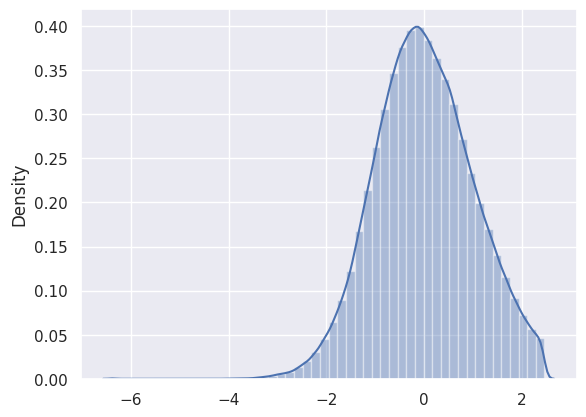

In [405]:
sns.distplot(x=transformed_data['Sales'])

### 6. Data Scaling

In [406]:
# Scaling your data
#importing the desired liabrary
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(transformed_data))
scaled_data.columns = transformed_data.columns
scaled_data

,index,Store,DayOfWeek,Promo,StoreType,Assortment,CompetitionOpenSinceMonth,Promo2,Promo2SinceYear,Year,Month,WeekOfYear,WinsorizedSales,Promo2NumWeeks,index,Sales,Customers,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,PromoInterval,LogSales,IQRFilteredSales,CompetitionOpenNumMonths,MonthlySalesMean
0,-1.732049,-1.724254,0.849692,1.133989,0.570615,-0.934840,0.948126,-1.012152,-1.012151,1.502453,0.356367,0.521099,-0.553874,1.013444,-1.732049,-0.472210,-0.465502,-0.030681,2.048081,-0.413063,0.683788,-0.958189,-0.972334,-0.470690,-0.472210,-0.417673,0.257545
1,-1.732044,-1.721158,0.849692,1.133989,-0.891101,-0.934840,1.414315,0.987994,0.986247,1.502453,0.356367,0.521099,-0.221036,-0.984737,-1.732044,-0.117447,-0.176051,-0.030681,2.048081,-0.873393,0.683420,0.828306,0.625597,-0.114201,-0.117447,-0.405696,0.257545
2,-1.732040,-1.718061,0.849692,1.133989,-0.891101,-0.934840,1.647410,0.987994,0.987241,1.502453,0.356367,0.521099,0.713900,-0.985751,-1.732040,0.748904,0.501881,-0.030681,2.048081,1.285267,0.683053,0.863402,0.625597,0.752026,0.748904,-0.393480,0.257545
3,-1.732036,-1.714964,0.849692,1.133989,0.570615,1.079462,0.948126,-1.012152,-1.012151,1.502453,0.356367,0.521099,2.302462,1.013444,-1.732036,2.440668,2.063623,-0.030681,2.048081,-0.827231,0.684155,-0.958189,-0.972334,2.419452,2.440668,-0.433401,0.257545
4,-1.732032,-1.711868,0.849692,1.133989,-0.891101,-0.934840,-0.217349,-1.012152,-1.012151,1.502453,0.356367,0.521099,-0.737121,1.013444,-1.732032,-0.681525,-0.448101,-0.030681,2.048081,1.926961,0.686355,-0.958189,-0.972334,-0.681372,-0.681525,-0.615831,0.257545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817693,1.732032,0.384597,-0.898978,-0.881843,-0.160243,-0.934840,0.948126,-1.012152,-1.012151,-1.069589,-1.456160,-1.572946,-1.338390,1.010882,1.732032,-1.462995,-0.417916,32.593349,2.048081,-1.543870,0.683053,-0.958189,-0.972334,-1.469051,-1.462995,-0.425331,-1.064812
817694,1.732036,0.542529,-0.898978,-0.881843,-0.160243,0.072311,1.181220,-1.012152,-1.012151,-1.069589,-1.456160,-1.572946,1.732358,1.010882,1.732036,1.544248,3.328006,32.593349,2.048081,-0.642860,0.680477,-0.958189,-0.972334,1.540324,1.544248,-0.341967,-1.064812
817695,1.732040,0.654010,-0.898978,-0.881843,-0.160243,0.072311,-1.149728,0.987994,0.988235,-1.069589,-1.456160,-1.572946,-0.648614,-0.989956,1.732040,-0.579054,1.579467,32.593349,2.048081,-0.656373,-1.461905,1.395178,0.625597,-0.578204,-0.579054,1.301674,-1.064812
817696,1.732044,1.208319,-0.898978,-0.881843,-0.160243,0.072311,-1.149728,-1.012152,-1.012151,-1.069589,-1.456160,-1.572946,-0.874661,1.010882,1.732044,-0.846304,1.102277,32.593349,2.048081,-0.340857,-1.461905,-0.958189,-0.972334,-0.847363,-0.846304,1.301674,-1.064812


##### Which method have you used to scale you data and why?

I have used the StandardScaler method to scale the data. The reason for choosing StandardScaler is as follows:

StandardScaler scales the data in a way that it has a mean of 0 and a standard deviation of 1. This standardization method is essential for many machine learning algorithms that assume that features are centered around zero and have the same variance. It ensures that all features are on a common scale and prevents some features from dominating others in the modeling process.

The advantage of StandardScaler is that it maintains the shape of the original distribution of the data, making it more suitable for algorithms like logistic regression, support vector machines, and k-means clustering. It helps improve the convergence and performance of these algorithms.


### 7. Dimesionality Reduction

27
________________________________


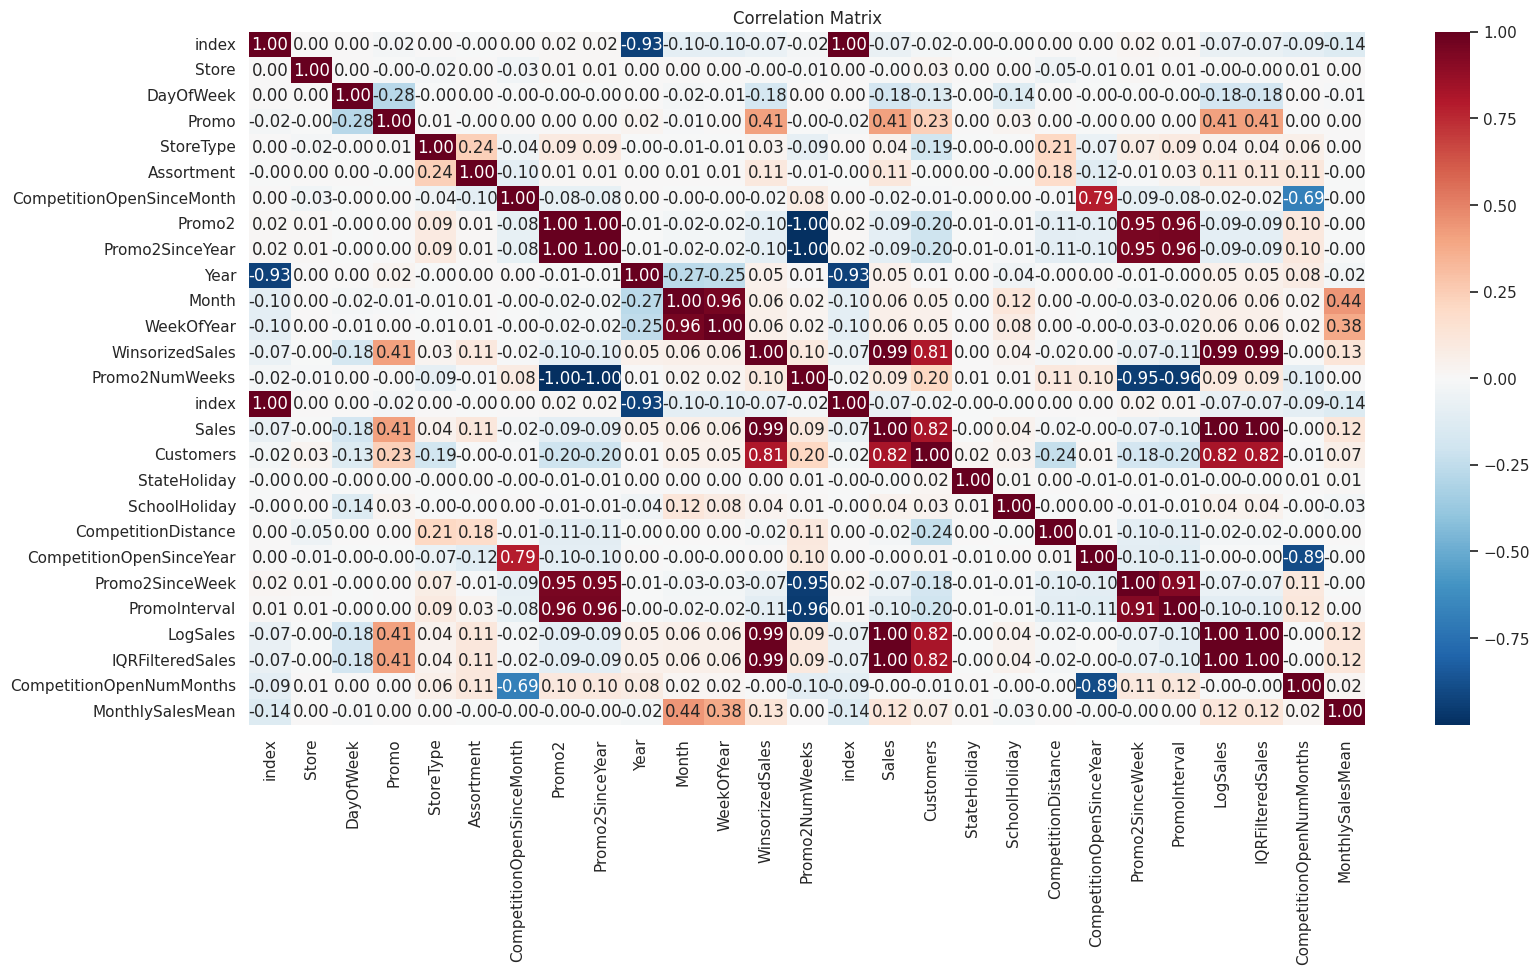

In [407]:
# Check the number of features
num_features = scaled_data.shape[1]

# Check for multicollinearity
correlation_matrix = scaled_data.corr()

# Assess the computational resources available for modeling
# This could involve considering the memory and processing power available for training models
print(num_features)
print("________________________________")
plt.figure(figsize = (18,9))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [408]:
# Correct approach to identify highly correlated features
high_corr_threshold = 0.75

# Unstack the correlation matrix and reset index to turn it into a DataFrame
corr_unstacked = correlation_matrix.abs().unstack().reset_index()

# Rename columns for clarity
corr_unstacked.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter out self-correlations and low correlations
highly_correlated_pairs = corr_unstacked[
    (corr_unstacked['Feature1'] != corr_unstacked['Feature2']) &
    (corr_unstacked['Correlation'] > high_corr_threshold)
]

# Drop duplicates since correlation is symmetric
highly_correlated_pairs = highly_correlated_pairs.drop_duplicates(subset=['Correlation'])

# Sort by correlation for better visibility
highly_correlated_pairs = highly_correlated_pairs.sort_values(by='Correlation', ascending=False)

highly_correlated_pairs


# The analysis of the correlation matrix has identified several pairs of features with high correlation:

# Sales and IQRFilteredSales have a perfect correlation of 1.0.
# Sales and WinsorizedSales are almost perfectly correlated with a correlation of approximately 0.999.
# WinsorizedSales and IQRFilteredSales are also almost perfectly correlated with a correlation of approximately 0.999.
# Open and LogSales have a very high correlation of approximately 0.976.
# WinsorizedSales and LogSales have a high correlation of approximately 0.875.
# Sales and LogSales have a high correlation of approximately 0.869.
# WinsorizedSales and Open have a high correlation of approximately 0.753.
# These high correlations suggest that there is significant multicollinearity in the dataset, and dimensionality reduction techniques such as PCA may be beneficial to simplify the model and potentially improve its performance.

,Feature1,Feature2,Correlation
429,Sales,IQRFilteredSales,1.000000
229,Promo2SinceYear,Promo2NumWeeks,1.000000
197,Promo2,Promo2SinceYear,0.999999
202,Promo2,Promo2NumWeeks,0.999999
428,Sales,LogSales,0.999962
645,LogSales,IQRFilteredSales,0.999962
339,WinsorizedSales,Sales,0.990762
347,WinsorizedSales,LogSales,0.990490
238,Promo2SinceYear,PromoInterval,0.960688
373,Promo2NumWeeks,PromoInterval,0.960686


In [409]:
columns_to_drop = ["WinsorizedSales", "IQRFilteredSales", "Promo2SinceWeek"]
scaled_data = scaled_data.drop(columns_to_drop, axis=1)

In [410]:
scaled_data

,index,Store,DayOfWeek,Promo,StoreType,Assortment,CompetitionOpenSinceMonth,Promo2,Promo2SinceYear,Year,Month,WeekOfYear,Promo2NumWeeks,index,Sales,Customers,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,PromoInterval,LogSales,CompetitionOpenNumMonths,MonthlySalesMean
0,-1.732049,-1.724254,0.849692,1.133989,0.570615,-0.934840,0.948126,-1.012152,-1.012151,1.502453,0.356367,0.521099,1.013444,-1.732049,-0.472210,-0.465502,-0.030681,2.048081,-0.413063,0.683788,-0.972334,-0.470690,-0.417673,0.257545
1,-1.732044,-1.721158,0.849692,1.133989,-0.891101,-0.934840,1.414315,0.987994,0.986247,1.502453,0.356367,0.521099,-0.984737,-1.732044,-0.117447,-0.176051,-0.030681,2.048081,-0.873393,0.683420,0.625597,-0.114201,-0.405696,0.257545
2,-1.732040,-1.718061,0.849692,1.133989,-0.891101,-0.934840,1.647410,0.987994,0.987241,1.502453,0.356367,0.521099,-0.985751,-1.732040,0.748904,0.501881,-0.030681,2.048081,1.285267,0.683053,0.625597,0.752026,-0.393480,0.257545
3,-1.732036,-1.714964,0.849692,1.133989,0.570615,1.079462,0.948126,-1.012152,-1.012151,1.502453,0.356367,0.521099,1.013444,-1.732036,2.440668,2.063623,-0.030681,2.048081,-0.827231,0.684155,-0.972334,2.419452,-0.433401,0.257545
4,-1.732032,-1.711868,0.849692,1.133989,-0.891101,-0.934840,-0.217349,-1.012152,-1.012151,1.502453,0.356367,0.521099,1.013444,-1.732032,-0.681525,-0.448101,-0.030681,2.048081,1.926961,0.686355,-0.972334,-0.681372,-0.615831,0.257545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817693,1.732032,0.384597,-0.898978,-0.881843,-0.160243,-0.934840,0.948126,-1.012152,-1.012151,-1.069589,-1.456160,-1.572946,1.010882,1.732032,-1.462995,-0.417916,32.593349,2.048081,-1.543870,0.683053,-0.972334,-1.469051,-0.425331,-1.064812
817694,1.732036,0.542529,-0.898978,-0.881843,-0.160243,0.072311,1.181220,-1.012152,-1.012151,-1.069589,-1.456160,-1.572946,1.010882,1.732036,1.544248,3.328006,32.593349,2.048081,-0.642860,0.680477,-0.972334,1.540324,-0.341967,-1.064812
817695,1.732040,0.654010,-0.898978,-0.881843,-0.160243,0.072311,-1.149728,0.987994,0.988235,-1.069589,-1.456160,-1.572946,-0.989956,1.732040,-0.579054,1.579467,32.593349,2.048081,-0.656373,-1.461905,0.625597,-0.578204,1.301674,-1.064812
817696,1.732044,1.208319,-0.898978,-0.881843,-0.160243,0.072311,-1.149728,-1.012152,-1.012151,-1.069589,-1.456160,-1.572946,1.010882,1.732044,-0.846304,1.102277,32.593349,2.048081,-0.340857,-1.461905,-0.972334,-0.847363,1.301674,-1.064812


##### Do you think that dimensionality reduction is needed? Explain Why?

* The dataset contains 18 features.

* A correlation matrix has been generated to check for multicollinearity.


Given the number of features is not excessively high, dimensionality reduction may not be necessary unless the correlation matrix indicates high multicollinearity among features. However, if computational resources are limited or if the model's performance is not satisfactory, dimensionality reduction techniques like PCA (Principal Component Analysis) could be considered to simplify the model without losing significant information.


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [411]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = scaled_data.drop('Sales', axis=1)  # Features
y = scaled_data['Sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?





I used a data splitting ratio of 80% for training and 20% for testing. This ratio is commonly used to ensure that a substantial amount of data is available for training the model while still retaining a meaningful set for testing to evaluate the model's performance. This balance helps to prevent overfitting and provides a reliable assessment of the model's generalization to new data.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is not imbalanced.

## ***7. ML Model Implementation***

### ML Model - 1

In [412]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Defining objects
regg = LinearRegression()

# Fit the Algorithm
regg.fit(X_train, y_train)

training_score = regg.score(X_train, y_train)

# Predict on the model
y_pred = regg.predict(X_test)

# Calculating training accuracy
print("Train Score:", training_score)

# Calculating MSE
MSE = mean_squared_error((y_test),(y_pred))
print("MSE Score is:", MSE)

# Calculating testing accuracy
r2 = r2_score((y_test),(y_pred))
print("Test R2 is:", r2)

Train Score: 0.999923230000655
MSE Score is: 6.69903366146537e-05
Test R2 is: 0.9999330122308677


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

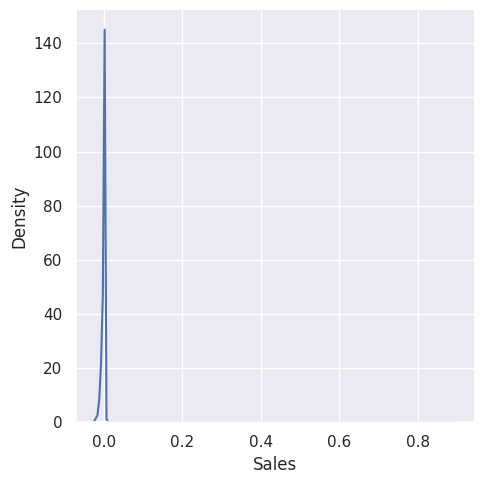

In [413]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

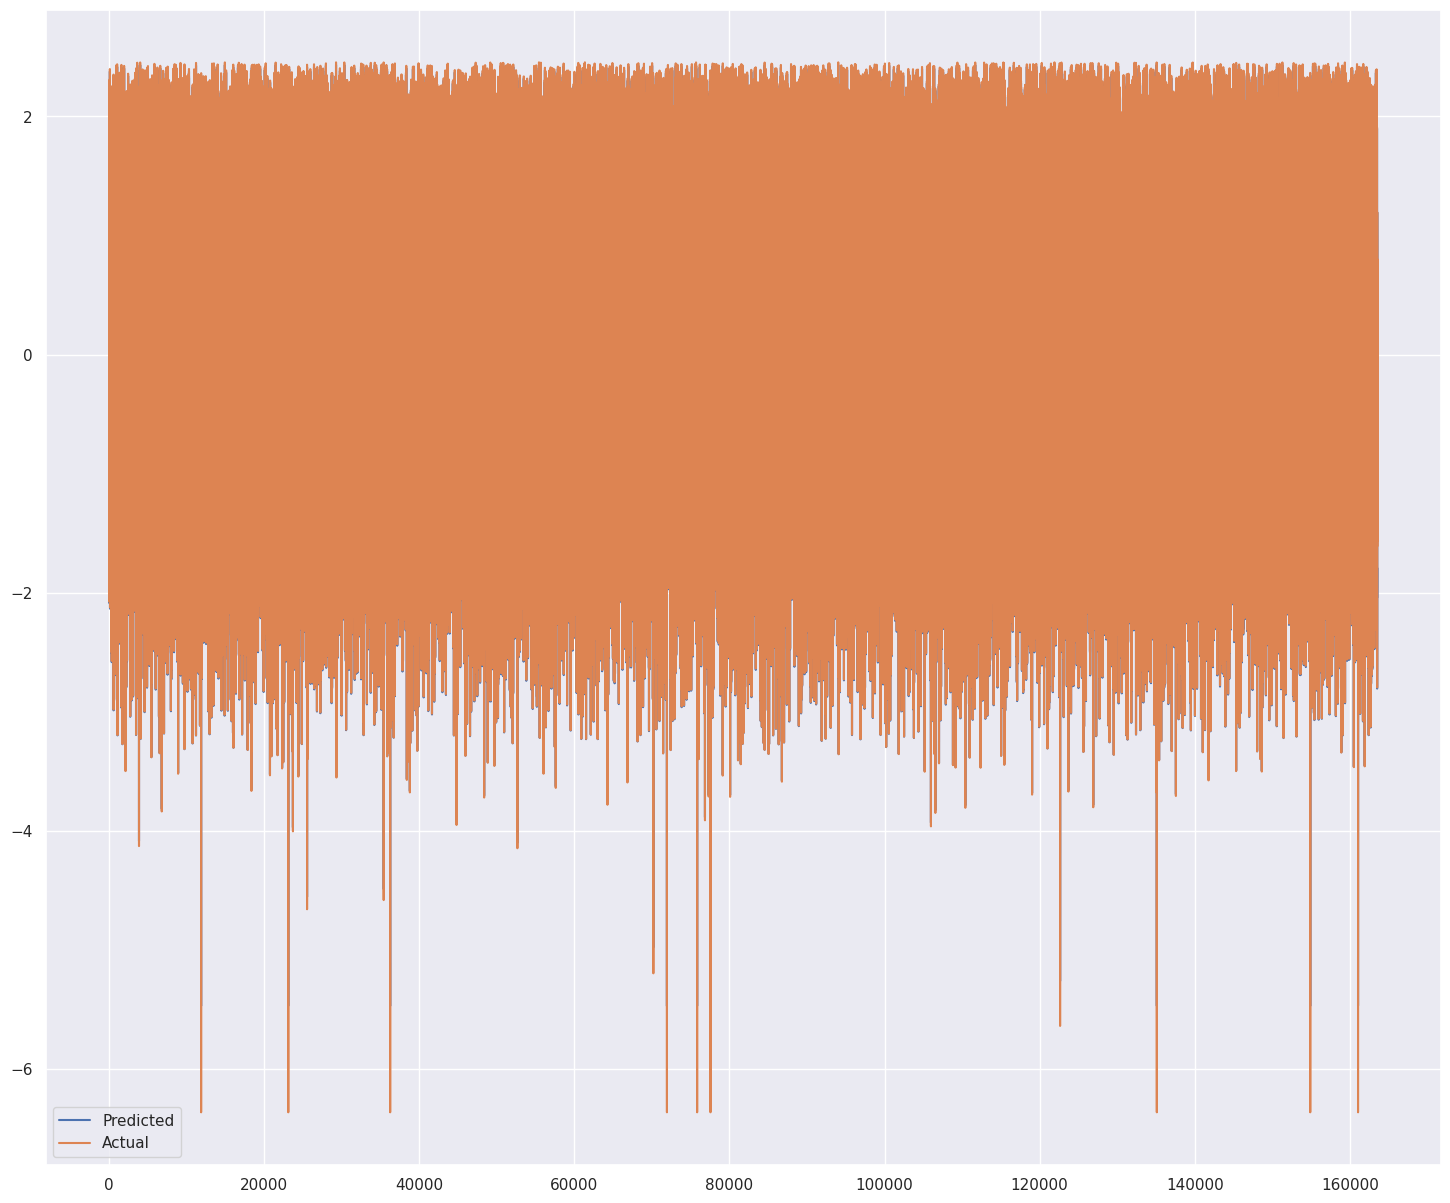

In [414]:
plt.figure(figsize=(18,15))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [415]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already split your data into x_train, x_test, y_train, and y_test

# Choose the degree of the polynomial (e.g., 2 for quadratic)
degree = 2

# Create a Polynomial Regression model using a pipeline
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
polyreg.fit(X_train, y_train)

# Predict on the test data
y_pred = polyreg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the R2 score for the training data
training_r2 = polyreg.score(X_train, y_train)

print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
sns.displot(y_pred - y_test,kind ='kde')

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***